<a href="https://colab.research.google.com/github/Alenushka2013/datasharing/blob/master/DataCamp_15_Hyperparameter_Tuning_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/credit-card-full.csv')

In [4]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
df['default payment next month'].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # Hyperparameters and Parameters


## Introduction & 'Parameters'

Розглянемо просту модель логістичної регресії. Ми створюємо оцінщик і підганяємо його під дані з налаштуваннями за замовчуванням. Оскільки модель логістичної регресії є лінійною, ми отримуємо бета-коефіцієнти для наших змінних. Вони знаходяться у властивості coef_ нашого об'єкту логістичної регресії. Однак, якщо ми роздрукуємо їх, то побачимо, що вони трохи неохайні.

In [ ]:
# from sklearn.linear_model import LogisticRegression
# log_reg_clf = LogisticRegression()
# log_reg_clf.fit(X_train, y_train)
# print(log_reg_clf.coef_)

[[-2.59725848e-05 -4.04976075e-06 -7.81761483e-07 -8.70966879e-07
  -8.36396093e-07 -1.07615203e-05  2.08235703e-06  1.65533531e-06
   1.43128804e-06  1.34721105e-06  1.19469749e-06  1.10764600e-06
  -8.93737362e-06  4.89972068e-06  1.94992894e-06  2.20164708e-06
   2.13651200e-06  1.92684148e-06 -2.72120176e-05 -2.30538603e-05
  -7.51405278e-06 -6.87803460e-06 -4.03849630e-06 -2.81121801e-06]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Виправимо це, створивши список вихідних змінних, об'єднавши імена атрибутів і список коефіцієнтів в охайний датафрйм для зручного перегляду.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

from sklearn.linear_model import LogisticRegression
log_reg_clf = LogisticRegression(max_iter = 31)
log_reg_clf.fit(X_train_scaled , y_train)
print(log_reg_clf.coef_)

print('Кількість ітерацій', log_reg_clf.n_iter_)

[[-0.00401863 -0.10672254 -0.05606122 -0.07764789 -0.07914643  0.07680148
   0.64892671  0.10956279  0.07687382  0.05231946  0.02241756  0.01497438
  -0.36442746  0.12486757  0.12071752 -0.05866616  0.03268191  0.02892781
  -0.17173064 -0.24902993 -0.02470636 -0.05528888 -0.02351524 -0.04764326]]
Кількість ітерацій [30]


Виправимо це, створивши список вихідних змінних, об'єднавши імена атрибутів і список коефіцієнтів в охайний датафрйм для зручного перегляду.

In [ ]:
# Get the original variables names
original_variables = list(X_train.columns)
# Zip together the names and coefficients
zipped_together = list(zip(original_variables, log_reg_clf.coef_[0]))
coefs = [list(x) for x in zipped_together]
# Put into a DataFrame with column labels
coefs = pd.DataFrame(coefs, columns = ['Variable', 'Coeficients'])
display(coefs)

Variable  Coeficients
0          ID    -0.004019
1   LIMIT_BAL    -0.106723
2         SEX    -0.056061
3   EDUCATION    -0.077648
4    MARRIAGE    -0.079146
5         AGE     0.076801
6       PAY_0     0.648927
7       PAY_2     0.109563
8       PAY_3     0.076874
9       PAY_4     0.052319
10      PAY_5     0.022418
11      PAY_6     0.014974
12  BILL_AMT1    -0.364427
13  BILL_AMT2     0.124868
14  BILL_AMT3     0.120718
15  BILL_AMT4    -0.058666
16  BILL_AMT5     0.032682
17  BILL_AMT6     0.028928
18   PAY_AMT1    -0.171731
19   PAY_AMT2    -0.249030
20   PAY_AMT3    -0.024706
21   PAY_AMT4    -0.055289
22   PAY_AMT5    -0.023515
23   PAY_AMT6    -0.047643

Тепер можна відсортувати датафрейм та вивести перші три результати. Коефіцієнти - є параметрами, оскільки ми не встановлювали їх самостійно, а були отримані в результаті процесу моделювання. В наших записах змінні pay пов'язані з тим, скільки місяців люди відкладали свої платежі. Ми бачимо, що наяність більшої кількості місяців підвищує ймовірність того, що хтось допустить неплатіж в наступному місяці.

In [ ]:
# Create a list of original variable names from the training DataFrame
original_variables = X_train.columns

# Extract the coefficients of the logistic regression estimator
model_coefficients = log_reg_clf.coef_[0]

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Variable" : original_variables, "Coefficient": model_coefficients})
print(coefficient_df)

# Print out the top 3 positive variables
top_three_df = coefficient_df.sort_values(by="Coefficient", axis=0, ascending=False)[0:3]
print('\n', 'top 3 positive variables')
print(top_three_df)

     Variable  Coefficient
0          ID    -0.004019
1   LIMIT_BAL    -0.106723
2         SEX    -0.056061
3   EDUCATION    -0.077648
4    MARRIAGE    -0.079146
5         AGE     0.076801
6       PAY_0     0.648927
7       PAY_2     0.109563
8       PAY_3     0.076874
9       PAY_4     0.052319
10      PAY_5     0.022418
11      PAY_6     0.014974
12  BILL_AMT1    -0.364427
13  BILL_AMT2     0.124868
14  BILL_AMT3     0.120718
15  BILL_AMT4    -0.058666
16  BILL_AMT5     0.032682
17  BILL_AMT6     0.028928
18   PAY_AMT1    -0.171731
19   PAY_AMT2    -0.249030
20   PAY_AMT3    -0.024706
21   PAY_AMT4    -0.055289
22   PAY_AMT5    -0.023515
23   PAY_AMT6    -0.047643

 top 3 positive variables
     Variable  Coefficient
6       PAY_0     0.648927
13  BILL_AMT2     0.124868
14  BILL_AMT3     0.120718


In [ ]:
coefficient_df.sort_values(by = ["Coefficient"], axis = 0, inplace = True, ascending = False)
print(coefficient_df.head(3))

     Variable  Coefficient
6       PAY_0     0.648927
13  BILL_AMT2     0.124868
14  BILL_AMT3     0.120718


Щоб дізнатися, які параметри видає алгоритм потрібно:
 - дізнатися про алгоритм та як він працює
 - дізнатися де зберігаються параметри (параметри можуть бути знайдені в секції Attributes відповідної документації)

Які параметри в деревних моделях, які  не мають лінійних коефіцієнтів?
Параметри цієї моделі знаходяться в вузлах дерев, які використовуються для побудови моделей, априклад по якій ознаці було виконано розділення та по якому значенню. Для демонстрації побудуємо оцінщик випадкового лісу та підженемо його до наших даних, встановивши max_depth = 2 тільки для візуалізації.

In [ ]:
# A simple random forest estimator
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth = 2)
rf_clf.fit(X_train_scaled, y_train)

# Pull out one tree from the forest
chosen_tree = rf_clf.estimators_[7]

Потім ми можемо витягнути для візуалізації одне дерево, знайдене в атрибуті 'estimators_' оцінювача випадкового лісу. Для спрощення ми просто покажемо зображення, але ви можете самостійно спробувати візуалізацію за допомогою згаданих пакетів.

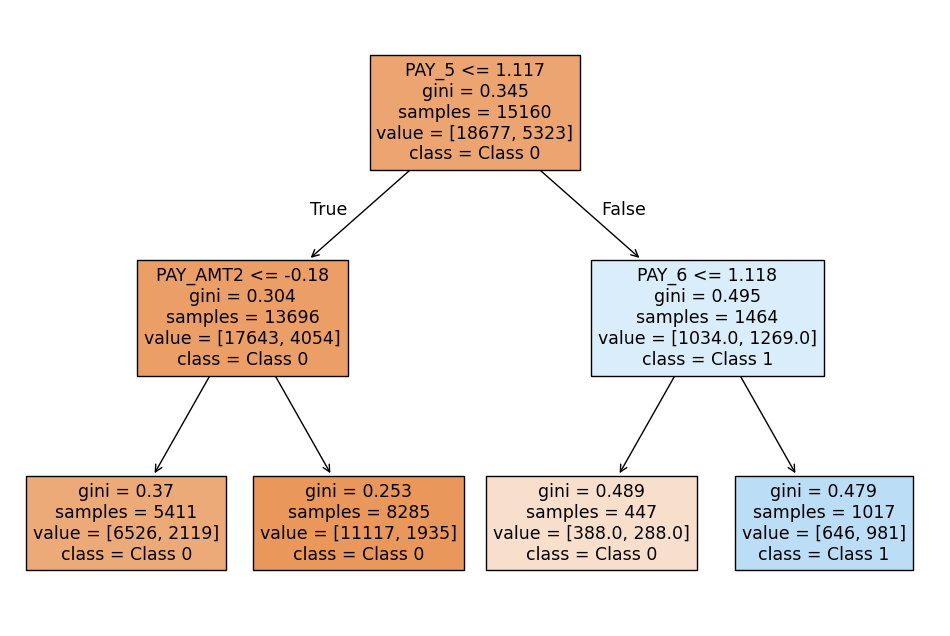

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(chosen_tree, filled=True, feature_names=original_variables, class_names=['Class 0', 'Class 1'])
plt.show()


Як програмним засобом витягнути розбиття, яке зображено на схемі?
Отримане дерево представляє собою об'єкт "дерево" з Scikit Learn, можна знайти змінну по якій воно  розділено, шляхом індексації  в атрибуті feature цього дерева та зіставляючи його з нашими стовпцями X_train, щоб отримати назву. Рівень, який використовується для розділення, потім знаходиться в атрибуті dot-threshold. І ми можемо це вивести.

In [ ]:
# Get the column in split on
split_column = chosen_tree.tree_.feature[1]
split_column_name = X_train.columns[split_column]
# Get the level in split on
split_value = chosen_tree.tree_.threshold[1]
print("This node split on feature {}, at a value of {}".format(split_column_name, split_value))

This node split on feature PAY_AMT2, at a value of -0.17956968396902084


### Tasks

In [ ]:
### 1

# Create a list of original variable names from the training DataFrame
original_variables = X_train.columns

# Extract the coefficients of the logistic regression estimator
model_coefficients = log_reg_clf.coef_[0]

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Variable" : original_variables, "Coefficient": model_coefficients})
print(coefficient_df)

# Print out the top 3 positive variables
top_three_df = coefficient_df.sort_values(by="Coefficient", axis=0, ascending=False)[0:3]
print(top_three_df)

     Variable  Coefficient
0          ID    -0.004019
1   LIMIT_BAL    -0.106723
2         SEX    -0.056061
3   EDUCATION    -0.077648
4    MARRIAGE    -0.079146
5         AGE     0.076801
6       PAY_0     0.648927
7       PAY_2     0.109563
8       PAY_3     0.076874
9       PAY_4     0.052319
10      PAY_5     0.022418
11      PAY_6     0.014974
12  BILL_AMT1    -0.364427
13  BILL_AMT2     0.124868
14  BILL_AMT3     0.120718
15  BILL_AMT4    -0.058666
16  BILL_AMT5     0.032682
17  BILL_AMT6     0.028928
18   PAY_AMT1    -0.171731
19   PAY_AMT2    -0.249030
20   PAY_AMT3    -0.024706
21   PAY_AMT4    -0.055289
22   PAY_AMT5    -0.023515
23   PAY_AMT6    -0.047643
     Variable  Coefficient
6       PAY_0     0.648927
13  BILL_AMT2     0.124868
14  BILL_AMT3     0.120718


In [ ]:
import matplotlib.pyplot as plt
### 2
# Extract the 7th (index 6) tree from the random forest
chosen_tree = rf_clf.estimators_[6]

# # Visualize the graph using the provided image
# imgplot = plt.imshow(tree_viz_image)
# plt.show()

# Extract the parameters and level of the top (index 0) node
split_column = chosen_tree.tree_.feature[0]
split_column_name = X_train.columns[split_column]
split_value = chosen_tree.tree_.threshold[0]

# Print out the feature and level
print("This node split on feature {}, at a value of {}".format(split_column_name, split_value))

## Introducing Hyperparameters

Можна легко побачити гіперпараметри, створивши екземпляр оцінщика і роздрукувавши його.

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Що означають ці гіперпараметри? Для відповіді на це питання краще звернутися до документації.

'n_estimators' - число дерев в лісі (за замовчуванням 100)

Ми можемо задати гіперпараметри при створенні об'єкту.

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=200, criterion = 'entropy')

In [ ]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Отримаємо інші значення гіперпараметрів, для яких ми встановили значення. Інші - лишилися за замовчуванням.

Знайдемо гіперпараметри для моделі логістичної регресії.

In [ ]:
log_reg_clf = LogisticRegression()
log_reg_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Деякі гіперпараметри важливіші за інші.

Ось деякі гіперпараметри, які не покращують продуктивність моделію. Вони пов'язані з обчислювальними рішеннями або тим, яку інформацію зберігати для аналізу.

При використанні RandomForestClassifier ці гіперпараметри не будуть підвищувати ефективність моделі

'n_jobs' - кількість ядер прискорить час моделювання

'random_state' - задання генератора випадкових величин

'verbose' - чи потрібно друкувати інформацію протягом роботи моделі.

Відповідно деякі гіперпараметри не потрібно "тренувати" під час роботи.

Існують деякі загальноприйняті важливі гіперпараметри для налаштування моделі випадкового лісу.

'n_estimators' - кількість дерев в лісі (варто встановити 500 або 1000)

'max_features' - керує кількістю ознак, які слід враховувати при розділенні, що дуже важливо для забезпечення різномаїття дерев.

'max_depth' і 'min_samples_leaf' - контролюють перенавчання окремих дерев

'criterion' - має невеликий вплив і , як правило, не є основним гіперпараметром, який слід враховувати.

Конкретна проблема може потребувати уваги до інших гіперпараметрів.


### Tasks

In [ ]:
### 1
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
### 2

from sklearn.metrics import confusion_matrix, accuracy_score

rf_clf_old = RandomForestClassifier(n_estimators = 20, max_leaf_nodes = 25, max_depth = 5)

# Print out the old estimator, notice which hyperparameter is badly set
print(rf_clf_old)

rf_clf_old.fit(X_train, y_train)
rf_old_predictions = rf_clf_old.predict(X_test)

# Get confusion matrix & accuracy for the old rf_model
print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
  	confusion_matrix(y_test, rf_old_predictions),
  	accuracy_score(y_test, rf_old_predictions)))

RandomForestClassifier(max_depth=5, max_leaf_nodes=25, n_estimators=20)
Confusion Matrix: 

 [[4527  160]
 [ 954  359]] 
 Accuracy Score: 

 0.8143333333333334


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Build a knn estimator for each value of n_neighbours
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_20 = KNeighborsClassifier(n_neighbors=20)

# Fit each to the training data & produce predictions
knn_5_predictions = knn_5.fit(X_train, y_train).predict(X_test)
knn_10_predictions = knn_10.fit(X_train, y_train).predict(X_test)
knn_20_predictions = knn_20.fit(X_train, y_train).predict(X_test)

# Get an accuracy score for each of the models
knn_5_accuracy = accuracy_score(y_test, knn_5_predictions)
knn_10_accuracy = accuracy_score(y_test, knn_10_predictions)
knn_20_accuracy = accuracy_score(y_test, knn_20_predictions)
print("The accuracy of 5, 10, 20 neighbours was {}, {}, {}".format(knn_5_accuracy, knn_10_accuracy,knn_20_accuracy))

The accuracy of 5, 10, 20 neighbours was 0.7508333333333334, 0.7758333333333334, 0.7811666666666667


## Setting & Analyzing Hyperparameter Values

Налаштуємо різні гіперпараметри та почнемо автоматизувати нашу роботу.

Які значення потрібно спробувати?

Це залежить від алгоритму і самого гіперпараметрую Однак в цьому питання вже існує передовий досвід.

Основні поради для вибору діапазонів для різних гіперпараметрів.

Перш за все важливо знати, які значення не варто встановлювати, оскільки вони можуть конфліктувати.

Для моделі LogisticRegression деякі значення 'penalty' можуть конфліктувати зі значеннями 'solver'.

Існують значеня, які можуть бути допустимі, але навряд чи дадуть гарні результати:
- алгоримт випадкового лісу з невеликою кількістю дерев (2, 5 або 10)
- один сусід в алгоритмі к - найближчих сусідів
- невелике збільшення деяких гіперпараметрів, навряд чи значно покращить модель(наприклад додавання одного дерева)

Дослідження та документування розумних цінностей для різних гіперпараметрів та алгоритмів буде дуже корисним заняттям.


Одна з речей, яку ми могли б спробувати, це використати цикл for. Ми створюємо список значень для перевірки. Потім перебираємо цей список, створюючи оцінку, підганяючи та прогнозуючи кожного разу. Ми додаємо точність до списку оцінок точності для подальшого аналізу. Цей метод дозволяє нам легко перевірити більше значень, ніж у попередній роботі.

In [ ]:
neighbors_list = [3, 5, 10, 20, 50, 75]
accuracy_list  = []

for test_number in neighbors_list:
  model = KNeighborsClassifier(n_neighbors=test_number)
  predictions = model.fit(X_train, y_train).predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  accuracy_list.append(accuracy)

print(accuracy_list)

[0.7346666666666667, 0.7508333333333334, 0.7758333333333334, 0.7811666666666667, 0.7825, 0.7818333333333334]


Можна зберегти результати в датафрейм, щоб подивитися вплив цього гіперпараметру на точність моделі.

In [ ]:
results_df = pd.DataFrame({'neighbors':neighbors_list, 'accuracy':accuracy_list})
display(results_df)

neighbors  accuracy
0          3  0.734667
1          5  0.750833
2         10  0.775833
3         20  0.781167
4         50  0.782500
5         75  0.781833

Схоже, що додавання додаткових сусідів більше 20 не допомагає.

Розповсюджений інструмент, кий використовується для аналізу впливу одиничного гіперпараметра на кінцевий результат, називається «крива навчання». Спочатку давайте створимо список із багатьох інших значень для тестування за допомогою функції range у Python. Решта коду така ж, як і раніше.

In [ ]:
neighbors_list = list(range(5, 500, 5))
accuracy_list  = []

for test_number in neighbors_list:
  model = KNeighborsClassifier(n_neighbors=test_number)
  predictions = model.fit(X_train, y_train).predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  accuracy_list.append(accuracy)

results_df = pd.DataFrame({'neighbors':neighbors_list, 'accuracy':accuracy_list})
display(results_df)

neighbors  accuracy
0           5  0.750833
1          10  0.775833
2          15  0.777333
3          20  0.781167
4          25  0.779167
..        ...       ...
94        475  0.781000
95        480  0.781000
96        485  0.781000
97        490  0.781000
98        495  0.781000

[99 rows x 2 columns]

Оскільки ми перевірили так багато значень, то для аналізу результатів будемо використовувати графік, а не таблицю.

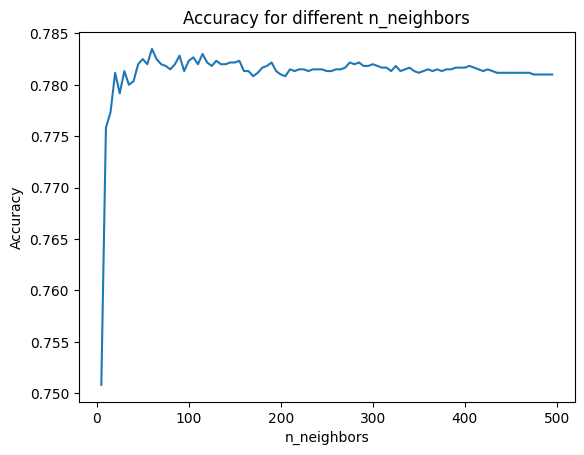

In [ ]:
import matplotlib.pyplot as plt

plt.plot(results_df['neighbors'], results_df['accuracy'])

# Додай підписи та заголовок
plt.gca().set(
    xlabel='n_neighbors',
    ylabel='Accuracy',
    title='Accuracy for different n_neighbors'
)

plt.show()


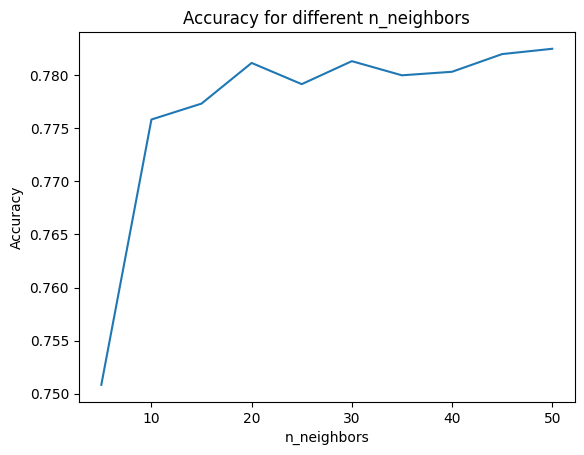

In [ ]:
plt.plot(results_df['neighbors'].iloc[:10], results_df['accuracy'].iloc[:10])

# Додай підписи та заголовок
plt.gca().set(
    xlabel='n_neighbors',
    ylabel='Accuracy',
    title='Accuracy for different n_neighbors'
)

plt.show()

Підозри підтвердилися: точність не збільшилася по рівняно з тим, що тестувалося раніше.

### Tasks

In [ ]:
### 1
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Set the learning rates & results storage
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
results_list = []

# Create the for loop to evaluate model predictions for each learning rate
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate=learning_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    # Save the learning rate and accuracy score
    results_list.append([learning_rate, accuracy_score(y_test, predictions )])

# Gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
print(results_df)

   learning_rate  accuracy
0          0.001  0.781167
1          0.010  0.814667
2          0.050  0.820500
3          0.100  0.820500
4          0.200  0.819000
5          0.500  0.815667


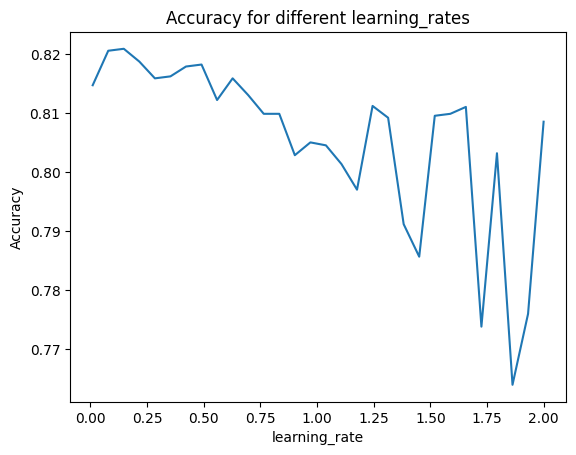

In [ ]:
### 2
import numpy as np

# Set the learning rates & accuracies list
learn_rates = np.linspace(0.01, 2, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:
  	# Create the model, predictions & save the accuracies as before
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot results
plt.plot(learn_rates, accuracies)
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
plt.show()

# **Grid search**

## Introducing Grid Search

In [8]:
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

Давайте згадаємо вашу попередню роботу з використанням циклу for для перевірки різних значень кількості сусідів в алгоритмі KNN. Потім ми зібрали їх у DataFrame для аналізу.

Але що, якщо ми хочемо перевірити різні значення двох гіперпараметрів? Візьмемо для прикладу алгоритм GBM, який має  більше гіперпараметрів для налаштування, ніж алгоритми KNN або Random Forest. Припустимо, ми хочемо налаштувати два гіперпараметри та значення наступним чином. Як би ви це зробили? Однією з пропозицій може бути вкладений цикл.

Спочатку ми можемо написати кращий код, використовуючи компонент створення моделі як функцію. Ми передаємо два значення гіперпараметрів як аргументи та використовуємо їх для створення моделі. Потім ми підганяємо наші дані та генеруємо прогнози. Нарешті, ми повертаємо використані значення гіперпараметрів та оцінку у списку для аналізу.

In [ ]:
# Create the function
def gbm_grid_search(learning_rate, max_depth):

	# Create the model
    model = GradientBoostingClassifier(learning_rate=learning_rate, max_depth=max_depth)

    # Use the model to make predictions
    predictions = model.fit(X_train, y_train).predict(X_test)

    # Return the hyperparameters and score
    return([learning_rate, max_depth, accuracy_score(y_test, predictions)])

Тепер ми можемо перебирати та викликати нашу функцію, додаючи результати до списку по ходу виконання. У нас є вкладений цикл, тому ми перевіряємо всі значення нашого першого гіперпараметра на наявність усіх значень нашого другого гіперпараметра.

In [ ]:
result_list = []
learn_rate_list = [0.01, 0.1, 0.5]
max_depth_list = [2,4,6]

for learn_rate in learn_rate_list:
  for max_depth in max_depth_list:
    result_list.append(gbm_grid_search(learn_rate, max_depth))

Ми також можемо зберегти ці результати у DataFrame, а потім роздрукувати їх для перегляду.

In [ ]:
results_df = pd.DataFrame(result_list, columns = ['learning_rate', 'max_depth', 'accuracy'])
display(results_df)

learning_rate  max_depth  accuracy
0           0.01          2  0.819500
1           0.01          4  0.815333
2           0.01          6  0.814167
3           0.10          2  0.820167
4           0.10          4  0.819333
5           0.10          6  0.821167
6           0.50          2  0.818167
7           0.50          4  0.810000
8           0.50          6  0.791833

Ви помітите, що при додаванні більшої кількості гіперпараметрів і значень для тестування створюється набагато більше моделей. Важливо, що цей зв'язок між створеними моделями та гіперпараметрами або значеннями для тестування не є лінійним. Для кожного зі значень, що перевіряються для першого гіперпараметра, ви тестуєте кожне значення другого гіперпараметра. Це означає, що для перевірки 5 значень для першого гіперпараметра та 10 значень для другого гіперпараметра нам потрібно запустити 50 моделей. А що, якби ми провели k-кратну перехресну перевірку кожної моделі 10 разів? Це було б 500 моделей для запуску!

Це було лише для 2 гіперпараметрів. Що, якби ми хотіли перевірити третій або четвертий гіперпараметр?

Спочатку ми перерахуємо додаткові значення для перевірки.Потім ми налаштовуємо нашу функцію, щоб вона враховувала більше вхідних даних. Зверніть увагу, що наша функція має складнішу модель, але дуже схожу на те, що ми робили раніше?

In [ ]:
# # Adjust the list of values to test
# learn_rate_list = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
# max_depth_list = [4, 6, 8, 10, 12, 15, 20, 25, 30]
# substable_list = [0.4, 0.6, 0.7, 0.8, 0.9]
# max_feature_list = ['auto', 'sqrt']

# # Create the function
# def gbm_grid_search(learning_rate, max_depth, substable, max_features):

# 	# Create the model
#     model = GradientBoostingClassifier(learning_rate=learning_rate,
#                                        max_depth=max_depth,
#                                        substable = subsample,
#                                        max_features = max_features)

#     # Use the model to make predictions
#     predictions = model.fit(X_train, y_train).predict(X_test)

#     # Return the hyperparameters and score
#     return([learning_rate, max_depth, accuracy_score(y_test, predictions)])

Зрештою, ми можемо налаштувати наш цикл for, щоб додати додатковий рівень вкладеності. Цей код також виглядатиме знайомим, ми просто додаємо більше рівнів вкладеності, але все ще зберігаємо наші результати для аналізу.

In [ ]:
# for learn_rate in learn_rate_list:
#   for max_depth in max_depth_list:
#     for subsample in substable_list:
#       for max_features in max_feature_list:
#         result_list.append(gbm_grid_search(learn_rate, max_depth, subsample, max_features))

# results_df = pd.DataFrame(results_list, columns = ['learning_rate', 'max_depth', 'subsample', 'max_features', 'accuracy'])
# print(results_df)

In [ ]:
7 * 9 * 5 * 2

630

Отже, скільки моделей ми щойно створили? Протестувавши 7 значень для нашого першого гіперпараметра та вказану кількість для інших гіперпараметрів, ми бачимо, що це число значно збільшилося. Можна з упевненістю сказати, що ми не можемо продовжувати вкладення вічно, оскільки наш код стає складним та неефективним. Крім того, що, якби нам також знадобилася додаткова інформація про час та результати навчання та тестування? Наш код стане досить складним.

Давайте розглянемо нашу роботу іншим способом. Якщо ми створили сітку з кожним значенням max_depth, яке ми хочемо перевірити, ліворуч, а кожне значення learning_rate — зверху. Квадрат перетину кожного з них — це модель, яку нам потрібно запустити.

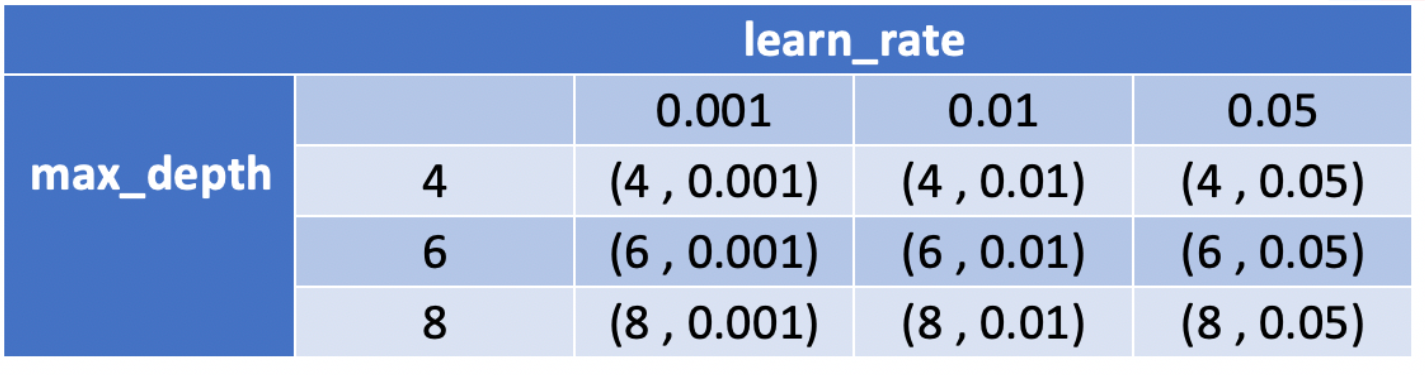

Запуск моделі для кожної комірки в сітці з заданими гіперпараметрами відомий як пошук по сітці. Наприклад, згадана тут комірка еквівалентна створенню оцінювача з підвищенням градієнта з цими вхідними даними.

Пошук за сіткою має низку переваг. Він програмний та економить багато рядків коду. Він гарантовано знайде найкращу модель у вказаній сітці. Але якщо ви вкажете погану сітку з незрозумілими або конфліктуючими значеннями, ви не отримаєте хорошого результату!Зрештою, це проста для пояснення методологія порівняно з деякими складнішими, які ми розглянемо пізніше в курсі.

Однак, цей підхід має деякі недоліки. Він вимагає великих обчислювальних ресурсів. Він також є «неінформованим», оскільки не навчається під час створення моделей, адже наступна створена ним модель може бути кращою або гіршою. Існують «інформовані» методи, які покращуються в міру створення дедалі більшої кількості моделей, і ми розглянемо їх пізніше в курсі.

### Tasks

In [ ]:
### 1
# Create the function
def gbm_grid_search(learning_rate, max_depth):

	# Create the model
    model = GradientBoostingClassifier(learning_rate=learning_rate, max_depth=max_depth)

    # Use the model to make predictions
    predictions = model.fit(X_train, y_train).predict(X_test)

    # Return the hyperparameters and score
    return([learning_rate, max_depth, accuracy_score(y_test, predictions)])

In [ ]:
# Create the relevant lists
results_list = []
learn_rate_list = [0.01, 0.1, 0.5]
max_depth_list = [2, 4, 6]

# Create the for loop
for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
        results_list.append(gbm_grid_search(learn_rate,max_depth))

# Print the results
print(results_list)

[[0.01, 2, 0.8195], [0.01, 4, 0.8153333333333334], [0.01, 6, 0.8143333333333334], [0.1, 2, 0.8201666666666667], [0.1, 4, 0.819], [0.1, 6, 0.8191666666666667], [0.5, 2, 0.8181666666666667], [0.5, 4, 0.8105], [0.5, 6, 0.7918333333333333]]


## Grid Search with Scikit Learn

У цьому уроці ми познайомимося з GridSearchCV від Scikit Learn. Він допоможе нам ефективніше створювати пошук по сітці та отримувати аналітику продуктивності.

In [ ]:
from sklearn.model_selection import GridSearchCV
# GridSearchCV(estimator = estimator,
#              param_grid = param_grid,
#              scoring = None,
#              fit_params = None,
#              n_jobs = None,
#              refit = True,
#              cv = 'warn',
#              verbose = 0,
#              pre_dispatch = '2*n_jobs',
#              error_score = 'raise-deprecastin',
#              return_train_score = 'warn')

Спочатку давайте концептуалізуємо кроки, необхідні для належного пошуку по сітці. Деякі з них будуть вам знайомі з нашої попередньої роботи.

 1. Виберіть алгоритм (або «оцінювач») для налаштування.
 2. Визначте, які гіперпараметри ми будемо налаштовувати.
 3. Визначте діапазон значень для кожного гіперпараметра.
 4. Визначте схему перехресної перевірки.
 5. Визначте функцію оцінювання, щоб визначити, яка модель була найкращою.
 6. Додайте додаткову корисну інформацію або функції. Єдиний з них, з яким ми раніше не працювали багато, це крок (4), але зараз ми розглянемо кожен з них.

Об'єкт GridSearchCV приймає кілька важливих аргументів:
- estimator - це наш алгоритм ( KNN, RandomForest, GBM, LogisticRegression або інші), для кожного пошуку по сітці обираємо тільки один алгоритм;
- param_grid - те, як ми повідомляємо які гуперпараметри та значення тестувати, потрібен словник, де ключі - імена гіперпараметрів, значення - список значень для перевірки. ключи мають бути допцстимими гіперпараметрами, інакше отримаємо помилку;
- cv - дозволяє проводити перехресну перевірку, можна вказати різні типи перехресної перевірки, просте вказування цілого числа створює k-fold cross validation;
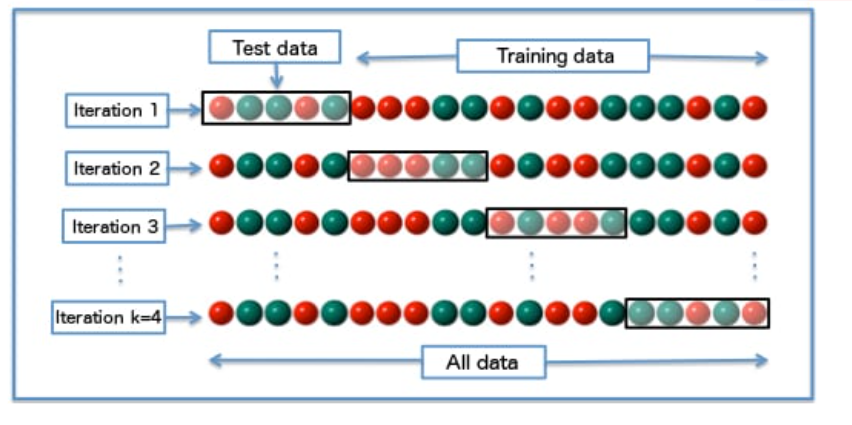
- scoring - це функція оцінювання, яка використовується для оцінки продуктивності вашої моделі. Ви робили це вручну раніше, використовуючи accuracy. Ви можете використовувати власну метрику або одну з доступних метрик з модуля метрик Scikit Learn. Ви можете перевірити всі доступні метрики за допомогою цієї команди;
- refit - якщо встановлено значення true, то для підгонки до навчальних даних використовуються найкращі комбінації гіперпараметрів;

Об'єкт GridSearchCV можна використовувати безпосередньо як оцінювач. Це дуже зручно, оскільки вам не потрібно зберігати наші найкращі гіперпараметри та навчати іншу модель.

- n_jobs - допомагає з паралельним виконанням. Ви можете ефективно «розділити» свою роботу та створювати багато моделей одночасно. Це можливо, оскільки результати однієї моделі не впливають на наступну. Ви можете перевірити, скільки ядер у вас є, що визначає, скільки моделей ви можете запускати паралельно, за допомогою цього зручного коду. Однак будьте обережні, використовуючи всі ядра для завдання, оскільки це може означати, що ви не зможете виконувати іншу роботу на своєму комп'ютері, поки ваші моделі працюють.,
- return_train_score - реєструє статистику про виконані навчальні запуску. Це може бути корисним для побудови графіків та розуміння продуктивності тестового набору порівняно з навчальним набором (а отже, компромісу між зміщенням та дисперсією). Хоча це інформативно, це є обчислювально ресурсоємним і не допоможе у пошуку найкращої моделі.

In [ ]:
from sklearn.metrics import get_scorer_names

for name in sorted(get_scorer_names()):
    print(name)

accuracy
adjusted_mutual_info_score
adjusted_rand_score
average_precision
balanced_accuracy
completeness_score
d2_absolute_error_score
explained_variance
f1
f1_macro
f1_micro
f1_samples
f1_weighted
fowlkes_mallows_score
homogeneity_score
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted
matthews_corrcoef
mutual_info_score
neg_brier_score
neg_log_loss
neg_max_error
neg_mean_absolute_error
neg_mean_absolute_percentage_error
neg_mean_gamma_deviance
neg_mean_poisson_deviance
neg_mean_squared_error
neg_mean_squared_log_error
neg_median_absolute_error
neg_negative_likelihood_ratio
neg_root_mean_squared_error
neg_root_mean_squared_log_error
normalized_mutual_info_score
positive_likelihood_ratio
precision
precision_macro
precision_micro
precision_samples
precision_weighted
r2
rand_score
recall
recall_macro
recall_micro
recall_samples
recall_weighted
roc_auc
roc_auc_ovo
roc_auc_ovo_weighted
roc_auc_ovr
roc_auc_ovr_weighted
top_k_accuracy
v_measure_score


In [ ]:
import os
print(os.cpu_count())

2


Тепер у нас є всі компоненти для створення об'єкта пошуку за сіткою. Спочатку ми створюємо нашу сітку параметрів для гіперпараметрів та значень, які ми хочемо ввести. Потім ми створюємо базовий класифікатор, встановлюючи деякі значення за замовчуванням під час створення.

In [ ]:
# Create the grid
param_grid = {'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [1, 2, 4, 6]}

# Get a base classifier with some set parameters
rf_class = RandomForestClassifier(criterion = 'entropy', max_features = 'sqrt')

Тепер ми можемо зібрати частини разом, щоб створити об'єкт GridSearchCV.

In [ ]:
grid_rf_class = GridSearchCV(
    estimator = rf_class,
    param_grid = param_grid,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 10,
    refit = True,
    return_train_score=True
)

Якщо для параметра «refit» встановлено значення True, ми можемо безпосередньо використовувати об'єкт GridSearchCV як оцінку. Це означає, що ми можемо підганяти дані та робити прогнози, як і будь-яка інша оцінка Scikit Learn!

In [ ]:
# Fit the object to our data
grid_rf_class.fit(X_train, y_train)

# Make predictions
grid_rf_class.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Подивитися найкращі параметри:
print("Best parameters found:", grid_rf_class.best_params_)

Best parameters found: {'max_depth': 8, 'min_samples_leaf': 2}


In [ ]:
# Оцінити точність на тестовому наборі:

# Прогнозування
y_pred = grid_rf_class.predict(X_test)

# Оцінка точності
print("Test accuracy:", round(accuracy_score(y_test, y_pred), 5))

Test accuracy: 0.8195


In [ ]:
# Подивитися найкращий скор:
print("Best cross-validated score:", grid_rf_class.best_score_.round(5))

Best cross-validated score: 0.82092


In [ ]:
# Таблиця всіх результатів:
results_df = pd.DataFrame(grid_rf_class.cv_results_)
display(results_df[['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score'))


params  mean_test_score  rank_test_score
13  {'max_depth': 8, 'min_samples_leaf': 2}         0.820917                1
15  {'max_depth': 8, 'min_samples_leaf': 6}         0.819792                2
12  {'max_depth': 8, 'min_samples_leaf': 1}         0.819583                3
14  {'max_depth': 8, 'min_samples_leaf': 4}         0.819583                3
9   {'max_depth': 6, 'min_samples_leaf': 2}         0.817667                5
10  {'max_depth': 6, 'min_samples_leaf': 4}         0.816875                6
8   {'max_depth': 6, 'min_samples_leaf': 1}         0.816583                7
11  {'max_depth': 6, 'min_samples_leaf': 6}         0.816583                8
7   {'max_depth': 4, 'min_samples_leaf': 6}         0.811167                9
4   {'max_depth': 4, 'min_samples_leaf': 1}         0.811042               10
5   {'max_depth': 4, 'min_samples_leaf': 2}         0.811042               10
6   {'max_depth': 4, 'min_samples_leaf': 4}         0.810792               12
3   {'max_depth': 2, 'min_samples_leaf': 6}         0.801417               13
0   {'max_depth': 2, 'min_samples_leaf': 1}         0.800875               14
2   {'max_depth': 2, 'min_samples_leaf': 4}         0.800625               15
1   {'max_depth': 2, 'min_samples_leaf': 2}         0.800083               16

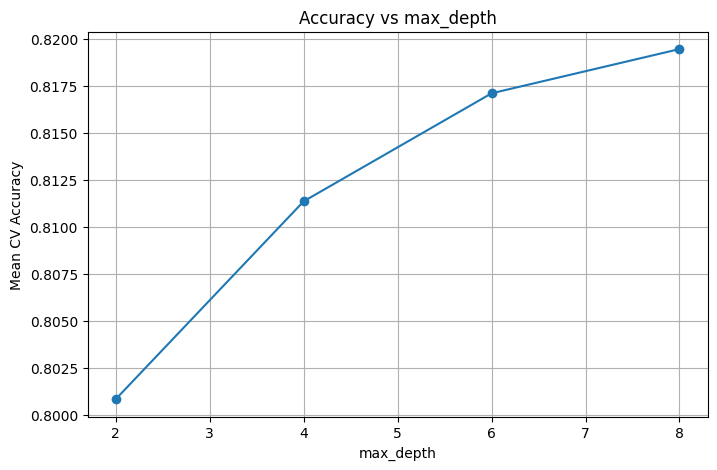

In [ ]:
#  Line Plot for max_depth vs Accurac
import matplotlib.pyplot as plt
import pandas as pd

# Extract results
results = pd.DataFrame(grid_rf_class.cv_results_)

# Group by max_depth and calculate mean accuracy
grouped = results.groupby('param_max_depth')['mean_test_score'].mean()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(grouped.index, grouped.values, marker='o')
plt.title('Accuracy vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()

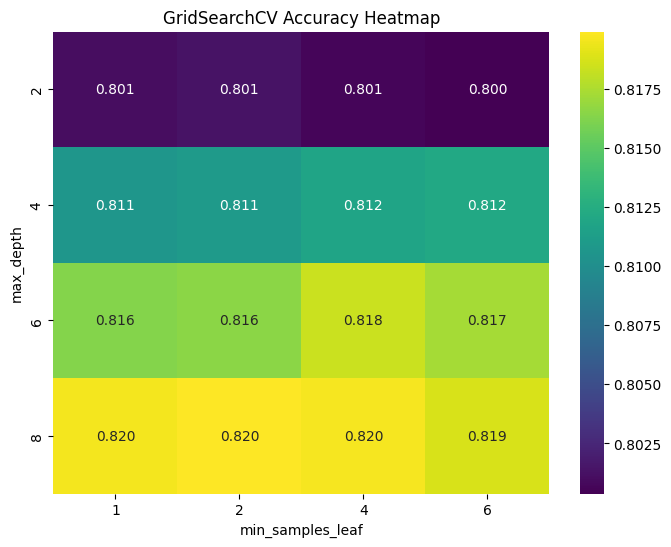

In [ ]:
#  Heatmap for max_depth × min_samples_leaf

import seaborn as sns

# Pivot table for heatmap
heatmap_data = results.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_min_samples_leaf'
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="viridis")
plt.title('GridSearchCV Accuracy Heatmap')
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.show()

### Tasks

In [ ]:
### 1
# Create a Random Forest Classifier with specified criterion
rf_class = RandomForestClassifier(criterion='entropy')

# Create the parameter grid
param_grid = {'max_depth':  [2, 4, 8, 15], 'max_features': ['auto', 'sqrt']}

# Create a GridSearchCV object
grid_rf_class = GridSearchCV(
    estimator=rf_class,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    refit=True, return_train_score=True)
print(grid_rf_class)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 8, 15],
                         'max_features': ['auto', 'sqrt']},
             return_train_score=True, scoring='roc_auc')


## Understanding a grid search output

Давайте тепер проаналізуємо кожну з властивостей виводу GridSearchCV та дізнаємося, як отримати до них доступ та використовувати їх. Властивості об'єкта можна розділити на три різні групи:
- журнал результатів cv_results_
- найкращі результати best_index_, best_params_ & best_score
-  «Додаткова інформація» scorer_, n_splits_ & refit_time_.

Доступ до властивостей здійснюється за допомогою крапкової нотації, тобто grid_search_object.property. Де property – це фактична властивість, яку потрібно отримати. Давайте розглянемо кожну з ключових властивостей.

По-перше, є властивість cv_results_. Це словник, який ми можемо зчитувати в pandas DataFrame для дослідження. Зверніть увагу, що рядків 12, оскільки в нашій сітці 12 квадратів. Кожен рядок розповідає про те, що сталося під час тестування цього квадрата.

In [ ]:
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
print(cv_results_df.shape)

(16, 32)


In [ ]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'split5_train_score', 'split6_train_score', 'split7_train_score',
       'split8_train_score', 'split9_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

У стовпцях «час» зазначено час, необхідний для підбору та оцінки моделі. Ми провели перехресну перевірку, тому її виконали 5 разів, і зберегли середнє значення та стандартне відхилення часу в секундах.

In [ ]:
# Вибираємо всі назви колонок, що містять 'time'
time_columns = [col for col in cv_results_df.columns if 'time' in col]

# Виводимо тільки ці колонки
print(cv_results_df[time_columns])


    mean_fit_time  std_fit_time  mean_score_time  std_score_time
0        2.622545      0.565146         0.026052        0.005795
1        2.638445      0.477509         0.026699        0.007355
2        2.844982      0.622659         0.025697        0.010421
3        2.775102      0.480547         0.023527        0.002175
4        5.345789      1.542959         0.033620        0.014921
5        4.497467      0.545458         0.037388        0.013215
6        4.520063      0.531758         0.031247        0.008359
7        4.632415      0.663304         0.028219        0.000840
8        6.890369      0.580685         0.042833        0.008201
9        7.197391      1.098645         0.039196        0.003684
10       7.440760      0.812324         0.044701        0.016530
11       7.331708      0.757534         0.037001        0.003062
12       8.927318      0.755700         0.044526        0.004423
13       8.847406      0.590995         0.040959        0.002756
14       8.611186      0.

Стовпці param_ містять інформацію про різні параметри, що використовувалися в моделі. Пам'ятайте, що кожен рядок у цьому DataFrame стосується однієї моделі.

Стовпець params – це словник усіх параметрів з попередніх стовпців «param». Тут нам потрібно використовувати pd.set_option, щоб переконатися, що ми не обрізаємо результати, які друкуємо.

In [ ]:
# Вибираємо всі назви колонок, що містять 'param'
param_columns = [col for col in cv_results_df.columns if 'param' in col]

# Виводимо тільки ці колонки
display(cv_results_df[param_columns])

param_max_depth  param_min_samples_leaf  \
0                 2                       1   
1                 2                       2   
2                 2                       4   
3                 2                       6   
4                 4                       1   
5                 4                       2   
6                 4                       4   
7                 4                       6   
8                 6                       1   
9                 6                       2   
10                6                       4   
11                6                       6   
12                8                       1   
13                8                       2   
14                8                       4   
15                8                       6   

                                     params  
0   {'max_depth': 2, 'min_samples_leaf': 1}  
1   {'max_depth': 2, 'min_samples_leaf': 2}  
2   {'max_depth': 2, 'min_samples_leaf': 4}  
3   {'max_depth': 2, 'min_samples_leaf': 6}  
4   {'max_depth': 4, 'min_samples_leaf': 1}  
5   {'max_depth': 4, 'min_samples_leaf': 2}  
6   {'max_depth': 4, 'min_samples_leaf': 4}  
7   {'max_depth': 4, 'min_samples_leaf': 6}  
8   {'max_depth': 6, 'min_samples_leaf': 1}  
9   {'max_depth': 6, 'min_samples_leaf': 2}  
10  {'max_depth': 6, 'min_samples_leaf': 4}  
11  {'max_depth': 6, 'min_samples_leaf': 6}  
12  {'max_depth': 8, 'min_samples_leaf': 1}  
13  {'max_depth': 8, 'min_samples_leaf': 2}  
14  {'max_depth': 8, 'min_samples_leaf': 4}  
15  {'max_depth': 8, 'min_samples_leaf': 6}

In [ ]:
pd.set_option('display.max_colwidth', None)
print(cv_results_df.loc[:, "params"])

0     {'max_depth': 2, 'min_samples_leaf': 1}
1     {'max_depth': 2, 'min_samples_leaf': 2}
2     {'max_depth': 2, 'min_samples_leaf': 4}
3     {'max_depth': 2, 'min_samples_leaf': 6}
4     {'max_depth': 4, 'min_samples_leaf': 1}
5     {'max_depth': 4, 'min_samples_leaf': 2}
6     {'max_depth': 4, 'min_samples_leaf': 4}
7     {'max_depth': 4, 'min_samples_leaf': 6}
8     {'max_depth': 6, 'min_samples_leaf': 1}
9     {'max_depth': 6, 'min_samples_leaf': 2}
10    {'max_depth': 6, 'min_samples_leaf': 4}
11    {'max_depth': 6, 'min_samples_leaf': 6}
12    {'max_depth': 8, 'min_samples_leaf': 1}
13    {'max_depth': 8, 'min_samples_leaf': 2}
14    {'max_depth': 8, 'min_samples_leaf': 4}
15    {'max_depth': 8, 'min_samples_leaf': 6}
Name: params, dtype: object


The rank column conveniently ranks the rows by the mean_test_score.

Використовуючи стовпець rank_test_score, ми можемо легко вибрати квадрат пошуку сітки для аналізу. Ця таблиця є рядком з об'єкта cv_results, який був найкраще створеною моделлю.

In [ ]:
# Вибираємо всі назви колонок, що містять 'test_score'
test_score_columns = [col for col in cv_results_df.columns if 'test' in col]

# Виводимо тільки ці колонки
display(cv_results_df[test_score_columns])

split0_test_score  split1_test_score  split2_test_score  \
0            0.796250           0.804167           0.811667   
1            0.792500           0.802500           0.807917   
2            0.795417           0.800000           0.808750   
3            0.796250           0.802083           0.806667   
4            0.804583           0.813333           0.822917   
5            0.803333           0.815000           0.820417   
6            0.801667           0.815417           0.823333   
7            0.803750           0.812083           0.825417   
8            0.807500           0.824167           0.827917   
9            0.812917           0.828333           0.827083   
10           0.806667           0.822917           0.825833   
11           0.809167           0.820833           0.828750   
12           0.815417           0.828333           0.823750   
13           0.813750           0.828333           0.825417   
14           0.815000           0.826250           0.826250   
15           0.814167           0.826667           0.828750   

    split3_test_score  split4_test_score  split5_test_score  \
0            0.802083           0.795000           0.797083   
1            0.802917           0.797083           0.799583   
2            0.803333           0.797500           0.797500   
3            0.803333           0.798750           0.798750   
4            0.815000           0.808750           0.809583   
5            0.818333           0.809583           0.809167   
6            0.816250           0.808750           0.809167   
7            0.817083           0.807500           0.808333   
8            0.823750           0.815417           0.812500   
9            0.820417           0.814167           0.813750   
10           0.822083           0.812917           0.819583   
11           0.819167           0.814583           0.814583   
12           0.825833           0.815417           0.820417   
13           0.828333           0.815000           0.823333   
14           0.826250           0.812917           0.823333   
15           0.825000           0.812083           0.822500   

    split6_test_score  split7_test_score  split8_test_score  \
0            0.803750           0.799583           0.805417   
1            0.802083           0.796250           0.803750   
2            0.804167           0.800417           0.805000   
3            0.806667           0.797083           0.807083   
4            0.812917           0.807917           0.817500   
5            0.815417           0.805833           0.815000   
6            0.814167           0.806667           0.815417   
7            0.813333           0.807917           0.815833   
8            0.816667           0.813333           0.819583   
9            0.819583           0.813750           0.820417   
10           0.819167           0.813750           0.821250   
11           0.820000           0.808750           0.820417   
12           0.821250           0.815417           0.821667   
13           0.821250           0.815833           0.823333   
14           0.820000           0.813750           0.820833   
15           0.821667           0.816250           0.822083   

    split9_test_score  mean_test_score  std_test_score  rank_test_score  
0            0.793750         0.800875        0.005295               14  
1            0.796250         0.800083        0.004345               16  
2            0.794167         0.800625        0.004403               15  
3            0.797500         0.801417        0.004079               13  
4            0.797917         0.811042        0.006620               10  
5            0.798333         0.811042        0.006673               10  
6            0.797083         0.810792        0.007323               12  
7            0.800417         0.811167        0.006841                9  
8            0.805000         0.816583        0.007011                7  
9            0.806250         0.817667        0.

In [ ]:
best_row = cv_results_df[cv_results_df["rank_test_score"] == 1]
display(best_row)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
13       8.847406      0.590995         0.040959        0.002756   

    param_max_depth  param_min_samples_leaf  \
13                8                       2   

                                     params  split0_test_score  \
13  {'max_depth': 8, 'min_samples_leaf': 2}            0.81375   

    split1_test_score  split2_test_score  ...  split2_train_score  \
13           0.828333           0.825417  ...             0.83838   

    split3_train_score  split4_train_score  split5_train_score  \
13            0.836528            0.837176            0.836991   

    split6_train_score  split7_train_score  split8_train_score  \
13            0.838241            0.838935            0.834676   

    split9_train_score  mean_train_score  std_train_score  
13             0.83787           0.83725         0.001207  

[1 rows x 32 columns]

Cтовпці test_score повторюються для результатів навчання. Зверніть увагу, що якби ми не встановили return_train_score на True, це не включало б результати навчання. Також немає стовпця рейтингу для результатів навчання, оскільки нас цікавить лише продуктивність на тестовому наборі.

In [ ]:
# Вибираємо всі назви колонок, що містять 'train_score'
train_score_columns = [col for col in cv_results_df.columns if 'train' in col]

# Виводимо тільки ці колонки
display(cv_results_df[train_score_columns])

split0_train_score  split1_train_score  split2_train_score  \
0             0.803889            0.801435            0.803333   
1             0.801111            0.800417            0.801296   
2             0.805139            0.798287            0.801065   
3             0.803519            0.798472            0.800278   
4             0.814352            0.811852            0.810880   
5             0.813935            0.811713            0.810694   
6             0.814028            0.811343            0.811435   
7             0.813102            0.811250            0.813102   
8             0.823565            0.823657            0.825741   
9             0.825046            0.827176            0.824954   
10            0.825093            0.824861            0.819815   
11            0.823935            0.822778            0.827176   
12            0.837639            0.836574            0.838796   
13            0.837731            0.835972            0.838380   
14            0.837685            0.835278            0.836944   
15            0.835370            0.834537            0.836019   

    split3_train_score  split4_train_score  split5_train_score  \
0             0.800185            0.798704            0.800093   
1             0.801111            0.801667            0.801250   
2             0.801481            0.800185            0.800926   
3             0.800324            0.801250            0.799769   
4             0.812639            0.813935            0.811944   
5             0.814491            0.814213            0.811991   
6             0.812639            0.814167            0.812269   
7             0.812778            0.813519            0.810602   
8             0.826528            0.827824            0.822593   
9             0.822593            0.826157            0.821806   
10            0.823750            0.826898            0.826667   
11            0.820324            0.825833            0.823750   
12            0.837315            0.837685            0.837315   
13            0.836528            0.837176            0.836991   
14            0.836250            0.836806            0.835324   
15            0.836296            0.835231            0.835231   

    split6_train_score  split7_train_score  split8_train_score  \
0             0.799815            0.800509            0.803935   
1             0.799630            0.799028            0.799907   
2             0.800185            0.801667            0.801157   
3             0.801574            0.800509            0.801389   
4             0.811991            0.814074            0.811019   
5             0.810741            0.813380            0.811991   
6             0.812176            0.812593            0.811343   
7             0.811250            0.812269            0.813657   
8             0.827500            0.821019            0.827407   
9             0.825880            0.827963            0.821759   
10            0.827176            0.826852            0.825556   
11            0.826435            0.821065            0.826574   
12            0.838472            0.836481            0.837130   
13            0.838241            0.838935            0.834676   
14            0.836389            0.837315            0.835787   
15            0.837222            0.836157            0.835417   

    split9_train_score  mean_train_score  std_train_score  
0             0.801806          0.801370         0.001740  
1             0.802824          0.800824         0.001046  
2             0.804676          0.801477         0.001943  
3             0.801435          0.800852         0.001264  
4             0.813611          0.812630         0.001219  
5             0.813935          0.812708         0.001373  
6             0.814861          0.812685         0.001198  
7             0.816204          0.812773         0.001514  
8             0.825972          0.825181         0.002214  
9             0.825926          0.8

Інформація про найкращий квадрат сітки знаходиться у трьох різних властивостях:
- best_params_, що є словником параметрів, що дали найкращий бал,
- best_score_ – фактичний найкращий бал
- best_index – рядок у нашому cv_results_, який був найкращим. Це те саме, що й індекс рядка з рангом 1 у cv_results_, який ми витягли щойно раніше.

In [ ]:
# Подивитися найкращі параметри:
print("Best parameters found:", grid_rf_class.best_params_)

Best parameters found: {'max_depth': 8, 'min_samples_leaf': 2}


In [ ]:
# Подивитися найкращий скор:
print("Best cross-validated score:", grid_rf_class.best_score_.round(5))

Best cross-validated score: 0.82092


In [ ]:
# Подивитися найкращий index:
print("Best index:", grid_rf_class.best_index_)

Best index: 13


GridSearchCV зберігає оцінку, побудовану з найкращими гіперпараметрами, у властивості best_estimator. Оскільки це оцінка, ми можемо використовувати її для прогнозування на нашому тестовому наборі. Ми можемо продемонструвати це, використовуючи функцію type у Python, і побачити, що це оцінка класифікації випадкового лісу. Ми також можемо використовувати сам об'єкт GridSearchCV безпосередньо як оцінку.

In [ ]:
type(grid_rf_class.best_estimator_)

sklearn.ensemble._forest.RandomForestClassifier

Ми можемо роздрукувати та переглянути саму оцінку. Саме тому ми встановлюємо refit=True під час створення пошуку по сітці, інакше нам довелося б самостійно переналаштувати, використовуючи найкращі параметри, перш ніж використовувати найкращу оцінку.

In [ ]:
print(grid_rf_class.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2)


Деяку додаткову інформацію можна отримати за допомогою наступних властивостей. Це не дуже корисні властивості, але можуть бути важливими, якщо ви побудуєте пошук по сітці по-іншому.
 До них належать:
  - scorer_ - функція оцінювання, яка використовувалася,
  - n_splits -  кількість перехресних перевірок
  (обидві з яких ми встановлюємо самі),
  - refit_time, що є кількістю секунд, використаних для повторного налаштування найкращої моделі на всьому наборі даних.
  
  Це може бути цікавим для аналізу ефективності у вашій роботі

### Tasks

In [ ]:
### 1
# Read the cv_results property into a dataframe & print it out
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
print(cv_results_df)

# Extract and print the column with a dictionary of hyperparameters used
column = cv_results_df.loc[:, ["params"]]
print(column)

# Extract and print the row that had the best mean test score
best_row = cv_results_df[cv_results_df["rank_test_score"] == 1]
print(best_row)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.622545      0.565146         0.026052        0.005795   
1        2.638445      0.477509         0.026699        0.007355   
2        2.844982      0.622659         0.025697        0.010421   
3        2.775102      0.480547         0.023527        0.002175   
4        5.345789      1.542959         0.033620        0.014921   
5        4.497467      0.545458         0.037388        0.013215   
6        4.520063      0.531758         0.031247        0.008359   
7        4.632415      0.663304         0.028219        0.000840   
8        6.890369      0.580685         0.042833        0.008201   
9        7.197391      1.098645         0.039196        0.003684   
10       7.440760      0.812324         0.044701        0.016530   
11       7.331708      0.757534         0.037001        0.003062   
12       8.927318      0.755700         0.044526        0.004423   
13       8.847406      0.590995         0.040959

In [ ]:
### 2
# Print out the ROC_AUC score from the best-performing square
best_score = grid_rf_class.best_score_
print(best_score)

# Create a variable from the row related to the best-performing square
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
best_row = cv_results_df.loc[[grid_rf_class.best_index_]]
print(best_row)

# # Get the n_estimators parameter from the best-performing square and print
# best_n_estimators = grid_rf_class.best_params_["n_estimators"]
# print(best_n_estimators)

0.8209166666666666
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
13       8.847406      0.590995         0.040959        0.002756   

    param_max_depth  param_min_samples_leaf  \
13                8                       2   

                                     params  split0_test_score  \
13  {'max_depth': 8, 'min_samples_leaf': 2}            0.81375   

    split1_test_score  split2_test_score  ...  split2_train_score  \
13           0.828333           0.825417  ...             0.83838   

    split3_train_score  split4_train_score  split5_train_score  \
13            0.836528            0.837176            0.836991   

    split6_train_score  split7_train_score  split8_train_score  \
13            0.838241            0.838935            0.834676   

    split9_train_score  mean_train_score  std_train_score  
13             0.83787           0.83725         0.001207  

[1 rows x 32 columns]


In [ ]:
### 3
from sklearn.metrics import roc_auc_score, confusion_matrix

# See what type of object the best_estimator_ property is
print(type(grid_rf_class.best_estimator_))

# Create an array of predictions directly using the best_estimator_ property
predictions = grid_rf_class.best_estimator_.predict(X_test)

# Take a look to confirm it worked, this should be an array of 1's and 0's
print(predictions[0:5])

# Now create a confusion matrix
print("Confusion Matrix \n", confusion_matrix(y_test, predictions))

# Get the ROC-AUC score
predictions_proba = grid_rf_class.best_estimator_.predict_proba(X_test)[:,1]
print("ROC-AUC Score \n", roc_auc_score(y_test, predictions_proba))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
[0 0 0 0 0]
Confusion Matrix 
 [[4456  231]
 [ 852  461]]
ROC-AUC Score 
 0.7772249603552535


In [ ]:
grid_rf_class.best_params_

{'max_depth': 8, 'min_samples_leaf': 2}

# Random Search

## Introducing Random Search

Випадковий пошук дуже схожий на пошук по сітці за кількома ключовими кроками.
 - Ми все ще визначаємо оцінку, які гіперпараметри налаштовувати та діапазон значень для кожного гіперпараметра.  
- Аналогічно, ми все ще встановлюємо схему перехресної перевірки та функцію оцінювання.

Однак, коли справа доходить до здійснення пошуку, замість того, щоб пробувати кожну окрему комбінацію, ви випадковим чином вибираєте N комбінацій та пробуєте їх. Це може здатися дуже дивним. Навіщо вам це робити і чому це працює?

У важливій статті Йошуа Бенджіо та Джеймса Бергстри (2012) викладено, що причину, чому це працює, можна пояснити двома фундаментальними принципами:
- по-перше, не кожен гіперпараметр є однаково важливим (ми натякали на це в розділі про пошук по сітці).
- По-друге, невеликий трюк з ймовірністю.

Пояснимо трюк з ймовірністю. Припустимо, що у нас є така сітка.

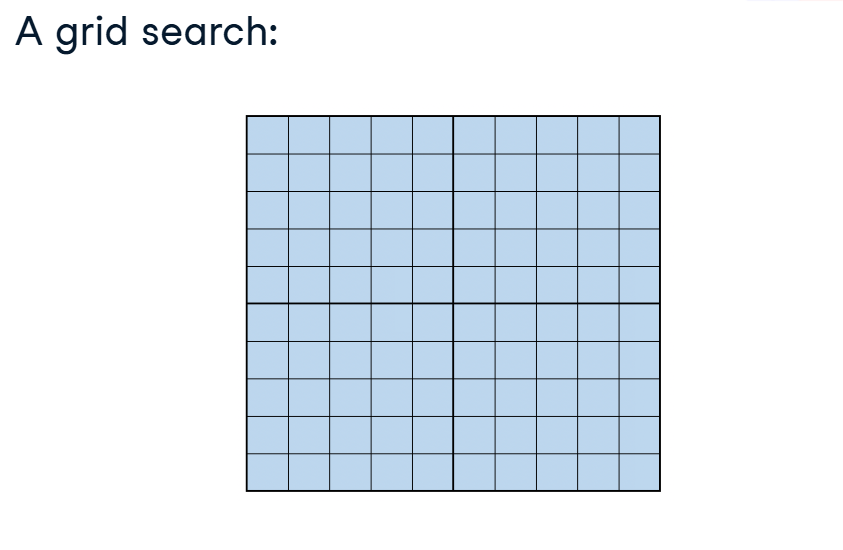

 Вона має 100 комірок, отже, 100 різних моделей. 10 різних значень кожного з двох гіперпараметрів. Припустимо, що ці 5 моделей є найкращими, виділені зеленим кольором.

 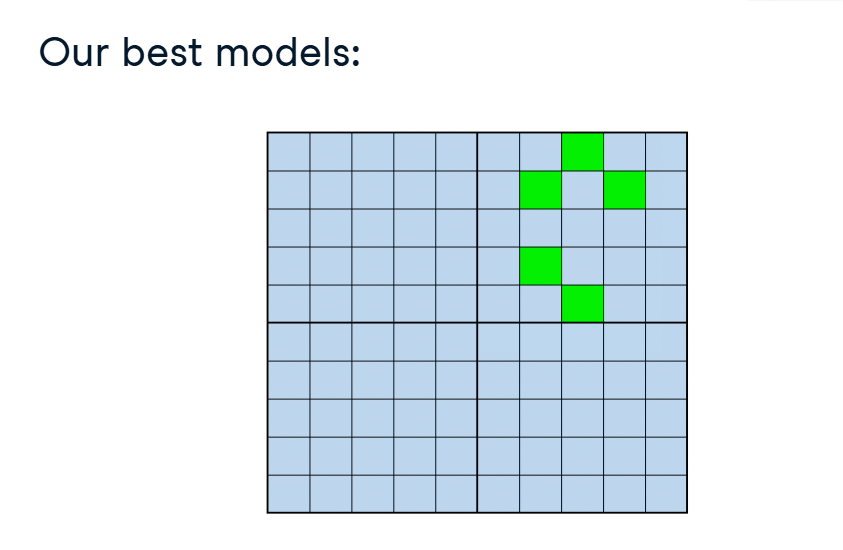

  Скільки моделей нам потрібно запустити з випадковим пошуком, щоб мати 95% ймовірність отримати один із зелених квадратів?

Розглянемо, наскільки ймовірно, що ми продовжимо повністю пропускати хороші моделі, якщо ми випадково вибиратимемо комбінації гіперпараметрів рівномірно. У нашій першій спробі у нас є 5% шанс отримати один із цих квадратів, оскільки це 5 квадратів зі 100. Отже, у нас є (1 мінус 0,05) шанс пропустити ці квадрати. Якщо ми проведемо другу спробу, у нас тепер є (1 мінус 0,05) помножене на (1 мінус 0,05) пропуску цього діапазону. Для третьої спроби у нас є (1 мінус 0,05) помножене на (1 мінус 0,05) помножене на (1 мінус 0,05) шанс пропустити цей діапазон. Фактично, з n спробами у нас є 1 мінус 0,05 у степені n шанс того, що кожна спроба пропустить усі хороші моделі.

Отже, скільки спроб потрібно зробити, щоб мати високий шанс потрапити в цю область? Ми знаємо, що ймовірність пропустити все дорівнює (1-0,05)^n. Отже, ймовірність потрапити щось у цю область має бути 1-(пропустити все), що дорівнює 1-(1-0,05)^n. Не вдаючись у зайві подробиці, ми можемо розв'язати цю задачу, щоб отримати відповідь як n >= 59.

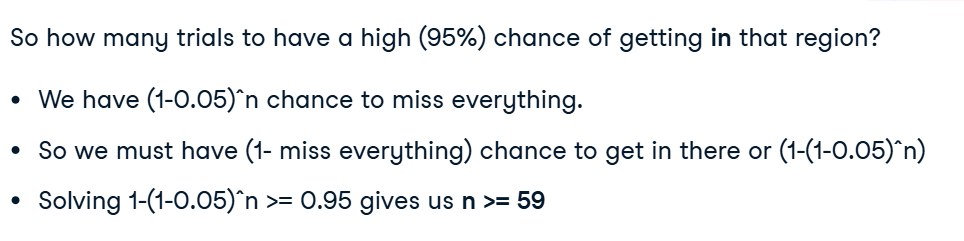

Отже, що все це означає? За допомогою відносно невеликої кількості спроб ми можемо наблизитися до нашого максимального балу з відносно високою ймовірністю. По суті, дуже малоймовірно, що ви продовжуватимете пропускати все протягом тривалого часу. Пошук по сітці може витратити багато часу на покриття поганої області.

Є кілька важливих моментів, які слід пам'ятати щодо випадкового пошуку.
 -  Ваш можливий результат залежить від встановленої сітки! Якщо ви оберете погану сітку для вибірки, ви не отримаєте гарної моделі.
  - Пам'ятайте, щоб об'єктивно порівняти це з пошуком по сітці, вам потрібен той самий «бюджет» моделювання. Наприклад, 200 моделей для пошуку по сітці та 200 моделей для випадкового пошуку.

Ми можемо створити власну випадкову вибірку комбінацій гіперпараметрів. Спочатку ми встановлюємо списки гіперпараметрів, як ви робили раніше, за допомогою linspace в NumPy та функції range. Потім ви можете створити єдиний список комбінацій гіперпараметрів, з якого ми можемо вибирати вибірки за допомогою функції product в itertools. Потім ми можемо випадково вибрати 100 моделей з цих списків за допомогою зручної функції випадкового вибору NumPy, яка дає нам 100 випадкових індексів, які ми можемо використовувати для індексації у створеному списку в останньому рядку.

In [9]:
from itertools import product
import random

# Set hyperparameter lists
learn_rate_list = np.linspace(0.001, 2, 150)
min_samples_leaf_list = list(range(1, 51))

# Create list of combinations
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_leaf_list)]

# Select 100 models from our larger set
random_combination_index = np.random.choice(range(0, len(combinations_list)), 100, replace = False)
combinations_random_chosen = [combinations_list[x] for x in random_combination_index]

Візуальний огляд значень гіперпараметрів, вибраних випадковим пошуком, – це гарний спосіб продемонструвати, як це працює. Зверніть увагу, що охоплення цього дуже широке, але не повністю?

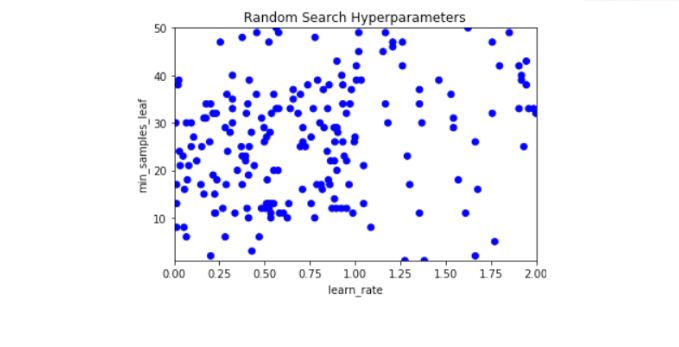

### Tasks

In [10]:
### 1

# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01,1.5,200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10,41))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Sample hyperparameter combinations for a random search.
random_combinations_index = np.random.choice(range(0, len(combinations_list)), 250, replace=False)
combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

# Print the result
print(combinations_random_chosen)

[[np.float64(0.5715577889447236), 34], [np.float64(0.3993467336683417), 26], [np.float64(0.8635678391959799), 28], [np.float64(0.07738693467336683), 12], [np.float64(0.968391959798995), 22], [np.float64(0.13728643216080402), 27], [np.float64(0.6464321608040201), 29], [np.float64(1.0282914572864321), 36], [np.float64(0.06989949748743718), 28], [np.float64(0.40683417085427137), 37], [np.float64(1.1106532663316582), 33], [np.float64(0.6314572864321608), 18], [np.float64(0.5266331658291458), 26], [np.float64(0.20467336683417087), 31], [np.float64(1.2978391959798994), 13], [np.float64(0.2945226130653266), 27], [np.float64(0.8710552763819095), 37], [np.float64(0.9833668341708542), 24], [np.float64(1.178040201005025), 23], [np.float64(0.9908542713567839), 39], [np.float64(0.7737185929648241), 14], [np.float64(1.5), 30], [np.float64(0.2570854271356784), 22], [np.float64(0.668894472361809), 28], [np.float64(0.04743718592964824), 23], [np.float64(0.3768844221105528), 26], [np.float64(1.215477386

In [11]:
### 2

# Create lists for criterion and max_features
criterion_list = ['gini', 'entropy']
max_feature_list = ["auto", "sqrt", "log2", None]

# Create a list of values for the max_depth hyperparameter
max_depth_list = list(range(3,56))

# Combination list
combinations_list = [list(x) for x in product(criterion_list, max_feature_list, max_depth_list)]

# Sample hyperparameter combinations for a random search
combinations_random_chosen = random.sample(combinations_list, 150)

# Print the result
print(combinations_random_chosen)

[['entropy', None, 21], ['gini', 'log2', 10], ['entropy', 'log2', 51], ['entropy', 'log2', 11], ['entropy', 'log2', 7], ['gini', None, 33], ['gini', None, 36], ['entropy', 'log2', 21], ['gini', 'auto', 34], ['gini', None, 48], ['entropy', 'auto', 26], ['entropy', None, 55], ['gini', 'sqrt', 32], ['entropy', 'sqrt', 14], ['gini', 'log2', 29], ['entropy', 'sqrt', 6], ['entropy', 'sqrt', 17], ['gini', None, 24], ['gini', 'auto', 25], ['gini', 'sqrt', 46], ['gini', 'log2', 41], ['gini', 'log2', 22], ['gini', 'sqrt', 44], ['gini', None, 54], ['entropy', 'sqrt', 12], ['gini', None, 42], ['entropy', None, 53], ['gini', 'auto', 45], ['gini', None, 47], ['gini', 'log2', 39], ['entropy', None, 9], ['entropy', None, 8], ['entropy', 'sqrt', 26], ['entropy', None, 30], ['gini', None, 31], ['entropy', 'sqrt', 3], ['gini', 'sqrt', 22], ['gini', 'sqrt', 38], ['entropy', None, 35], ['entropy', 'sqrt', 39], ['gini', 'sqrt', 25], ['gini', None, 14], ['entropy', 'auto', 46], ['entropy', 'sqrt', 23], ['ent

In [12]:
# def sample_and_visualize_hyperparameters(n_samples):

#   # If asking for all combinations, just return the entire list.
#   if n_samples == len(combinations_list):
#     combinations_random_chosen = combinations_list
#   else:
#     combinations_random_chosen = []
#     random_combinations_index = np.random.choice(range(0, len(combinations_list)), n_samples, replace=False)
#     combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

#   # Pull out the X and Y to plot
#   rand_y, rand_x = [x[0] for x in combinations_random_chosen], [x[1] for x in combinations_random_chosen]

#   x_lims = (min(rand_y) - 0.01, max(rand_y) + 0.01)  # learn_rate — зазвичай float
#   y_lims = (min(rand_x) - 1, max(rand_x) + 1)        # min_samples_leaf — зазвичай int

#   # Plot
#   plt.clf()
#   plt.scatter(rand_y, rand_x, c=['blue']*len(combinations_random_chosen))
#   plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Random Search Hyperparameters')
#   plt.gca().set_xlim(x_lims)
#   plt.gca().set_ylim(y_lims)
#   plt.show()

In [13]:
### 3

# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# # Sample and visualise specified combinations
# for x in [50, 500, 1500]:
#     sample_and_visualize_hyperparameters(x)

# # Sample all the hyperparameter combinations & visualise
# sample_and_visualize_hyperparameters(number_combs)

424


## Random Search in Scikit Learn

У цьому уроці ми познайомимося з модулем RandomizedSearchCV у Scikit Learn. Як і у випадку з GridSearchCV, це ефективніший спосіб виконання випадкового пошуку, ніж ручний, і дозволяє нам легко збирати додаткову інформацію про наше навчання.

Оскільки ми вже розглянули GridSearchCV, нам не потрібно вивчати багато нових кроків. Давайте нагадаємо кроки для пошуку по сітці:

1. Визначте алгоритм для налаштування гіперпараметрів (іноді його називають «оцінювачем»).
2. Визначте, які гіперпараметри ми будемо налаштовувати.
3. Визначте діапазон значень для кожного гіперпараметра.
4. Встановіть схему перехресної перевірки.
5. Визначте функцію оцінювання, щоб ми могли вирішити, який квадрат сітки (модель) був найкращим.
6. Вирішіть включити додаткову корисну інформацію або функції.

Є лише одна відмінність під час проведення випадкового пошуку. Нам потрібно вирішити, скільки комбінацій гіперпараметрів ми будемо випадково вибірково вибирати для побудови моделей, а потім виконати цю вибірку перед моделюванням. І це, власне, все!

Тому не дивно, наскільки схожі функції між двома модулями Scikit Learn. Розгляньте їх тут поруч. Можливо, не очевидно, що відрізняються, оскільки спільного набагато більше, ніж ні!

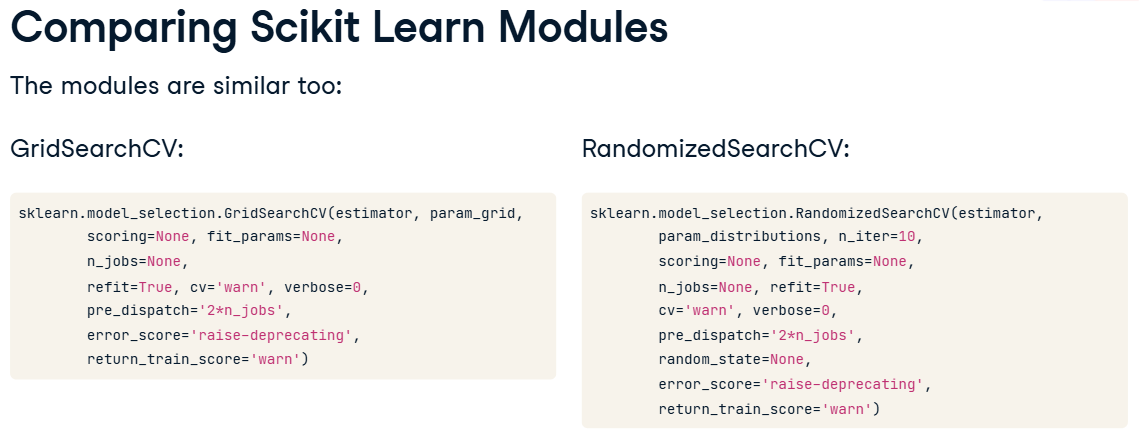

Насправді є лише дві ключові відмінності:
 - n_iter – це кількість вибірок для випадкового пошуку, які потрібно взяти з вашої сітки. У попередньому прикладі ви зробили 300.  
 - param_distributions дещо відрізняється від param_grid. Ви можете за бажанням надати інформацію про те, як проводити вибірку, наприклад, використовуючи певний розподіл, який ви надаєте.

 Якщо ви просто надаєте список, як ми робили, вибірка за замовчуванням виконується «рівномірно», тобто кожен елемент у списку (комбінації) має рівні шанси бути обраним.

Тепер створимо об'єкт RandomSearchCV, включаючи ключові зміни, які нам потрібно внести. Створення списку значень та налаштування сітки виглядають дуже схоже. Спочатку ми створюємо списки значень гіперпараметрів за допомогою функцій np-dot-linspace() та range(), потім налаштовуємо сітку словника значень гіперпараметрів. Найважливіша невелика відмінність полягає в кінці, де визначається, скільки вибірок потрібно взяти.

In [21]:
import numpy as np

# Set up the sample space
learn_rate_list = np.linspace(0.001, 2, 15)
min_sample_leaf_list = list(range(1, 51, 4))

# Create the grid
parameter_grid = {
    'learning_rate': learn_rate_list,
    'min_samples_leaf': min_sample_leaf_list
}

# Define how many samples
number_models = 10

Тепер ми створюємо об'єкт випадкового пошуку. Зверніть увагу на дещо іншу назву параметра сітки, яка тепер називається «param_distributions», а також на наш новий вхідний параметр n_iter для кількості комбінацій для вибору та навчання моделей.

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(n_estimators = 50),
    param_distributions = parameter_grid,
    n_iter = number_models,
    scoring = 'accuracy',
    n_jobs = 1,
    cv = 3,
    refit = True,
    return_train_score = True
)

# Fit the object to our data
random_GBM_class.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=1,
                   param_distributions={'learning_rate': array([1.00000000e-03, 1.43785714e-01, 2.86571429e-01, 4.29357143e-01,
       5.72142857e-01, 7.14928571e-01, 8.57714286e-01, 1.00050000e+00,
       1.14328571e+00, 1.28607143e+00, 1.42885714e+00, 1.57164286e+00,
       1.71442857e+00, 1.85721429e+00, 2.00000000e+00]),
                                        'min_samples_leaf': [1, 5, 9, 13, 17,
                                                             21, 25, 29, 33, 37,
                                                             41, 45, 49]},
                   return_train_score=True, scoring='accuracy')

Атрибути, що формують вивід RandomizedSearchCV, точно такі ж, як і в модуля GridSearchCV. Однак було б цікаво побачити, які числа він вибірково обробляв. Ми можемо візуалізувати це за допомогою коду з попереднього уроку, але де ми можемо отримати детальну інформацію про використані гіперпараметри? Пам'ятаєте? Так, вони знаходяться у повернутому словнику cv_results_ та у відповідних стовпцях param_. Давайте витягнемо learning_rate та min_samples_leaf, які використовуються для їх побудови.

[Text(0.5, 0, 'learning_rate'),
 Text(0, 0.5, 'min_samples_leaf'),
 Text(0.5, 1.0, 'Random Search Hyperparameters')]

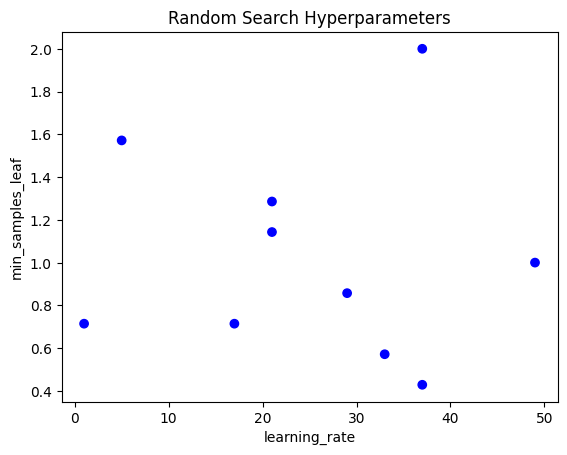

In [23]:
rand_x = list(random_GBM_class.cv_results_['param_learning_rate'])
rand_y = list(random_GBM_class.cv_results_['param_min_samples_leaf'])

# Make sure we set the limits of Y and X appriately
x_lims = [np.min(learn_rate_list), np.max(learn_rate_list)]
y_lims = [np.min(min_samples_leaf_list), np.max(min_samples_leaf_list)]

# Plot the retults
plt.scatter(rand_y, rand_x, c = ['blue'] * number_models)
plt.gca().set(xlabel = 'learning_rate', ylabel = 'min_samples_leaf',
              title = 'Random Search Hyperparameters')

Тепер ми можемо побудувати графік наших результатів. Ми встановлюємо обмеження x та y, використовуючи функції min та max з NumPy для нашого списку значень гіперпараметрів, щоб найкраще побачити покриття. Потім ми будуємо ці комбінації у вигляді діаграми розсіювання. Для обчислювальної ефективності цього разу ми запустили лише 10 моделей. Інакше це зайняло б деякий час!

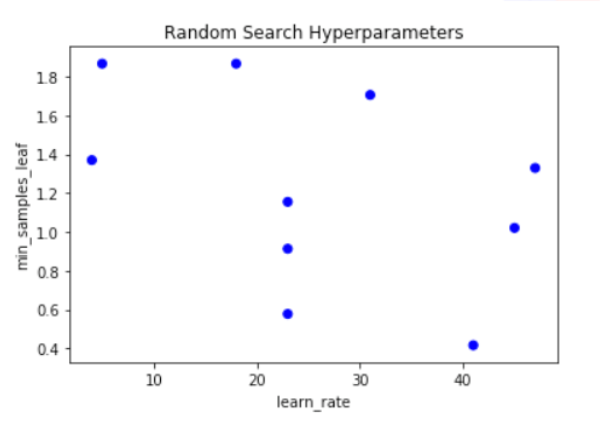

Ви помітите, що цей графік виглядає дуже схожим на те, що було зображено раніше як комбінації гіперпараметрів без фактичного створення моделі. Тепер, коли ми фактично запустили один графік, він виглядає дуже схожим. Випадковий пошук має широке покриття області для можливих гіперпараметрів, але це дуже неоднорідне покриття.

### Tasks

In [26]:
### 1
# Create the parameter grid
param_grid = {'learning_rate': np.linspace(0.1,2,15), 'min_samples_leaf': list(range(20,65, 5))}

# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator =  GradientBoostingClassifier(n_estimators = 50),
    param_distributions = param_grid,
    n_iter = 10,
    scoring='accuracy', n_jobs=-1, cv = 5, refit=True, return_train_score = True)

# Fit to the training data
random_GBM_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_GBM_class.cv_results_['param_learning_rate'])
print(random_GBM_class.cv_results_['param_min_samples_leaf'])

[1.457142857142857 0.6428571428571428 0.37142857142857144
 1.5928571428571427 0.2357142857142857 1.05 0.37142857142857144 2.0
 1.5928571428571427 0.7785714285714285]
[40 50 30 30 50 25 45 35 55 50]


In [30]:
### 2
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid
param_grid = {'max_depth': list(range(5, 26, 2)), 'max_features': ['log2','sqrt']}

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator = RandomForestClassifier(n_estimators=80),
    param_distributions = param_grid, n_iter = 5,
    scoring='roc_auc', n_jobs=-1, cv = 3, refit=True, return_train_score = True )

# Fit to the training data
random_rf_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])

[23 9 23 7 17]
['log2' 'sqrt' 'sqrt' 'sqrt' 'log2']


## Comparing Grid and Random Search

Ці методи мають низку подібностей.
 - Обидва є автоматизованими способами налаштування різних гіперпараметрів.
 - Для обох ви встановлюєте сітку для вибірки (які гіперпараметри та значення для кожного).
 - Для обох вам потрібно ретельно продумати, з яких гіперпараметрів та значень вибірково вибирати, оскільки ваша модель буде настільки хорошою, наскільки хороша встановлена ​​вами сітка!
 -  І для обох ви встановлюєте схему перехресної перевірки та функцію оцінювання.

Також існують деякі ключові відмінності між цими двома методами.
- Пошук за сіткою вичерпно перебирає всі комбінації в сітці або просторі вибірки і тому не має методології вибірки.
- Випадковий пошук випадковим чином пробує підмножину комбінацій, і ви додатково можете визначити, як проводити вибірку. Пам'ятайте, що за замовчуванням у Scikit Learn кожна комбінація має однакову ймовірність бути вибраною, також відома як рівномірний розподіл. Через це пошук за сіткою є дуже обчислювально ресурсоємним порівняно з випадковим пошуком. Але пошук за сіткою гарантовано знайде найкращий результат у просторі вибірки, тоді як випадковий пошук - ні. Хоча випадковий пошук має більший шанс знайти хороший результат швидше.

Отже, яку техніку слід використовувати? Як ми часто кажемо в науці про дані – «Це залежить». Однак є деякі речі, які ви можете врахувати. По-перше, чим більше у вас даних, тим сильніший аргумент на користь випадкового пошуку. Більше гіперпараметрів і значень для спроби також означає, що випадковий пошук може бути кращим варіантом. Крім того, якщо у вас небагато часу або обчислювальної потужності, випадковий пошук буде більш економічним. Пам’ятайте, що випадковий пошук має більше шансів отримати хороший результат швидше, навіть якщо він не найкращий.

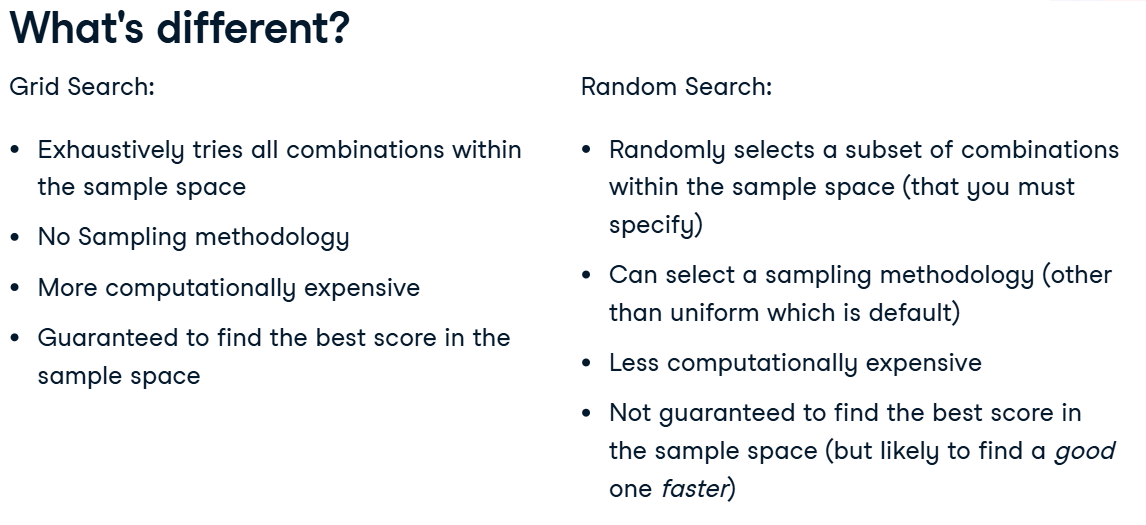

### Tasks

In [29]:
### 1

# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Print result
print(grid_combinations_chosen)

[['gini', 'auto', 3], ['gini', 'auto', 4], ['gini', 'auto', 5], ['gini', 'auto', 6], ['gini', 'auto', 7], ['gini', 'auto', 8], ['gini', 'auto', 9], ['gini', 'auto', 10], ['gini', 'auto', 11], ['gini', 'auto', 12], ['gini', 'auto', 13], ['gini', 'auto', 14], ['gini', 'auto', 15], ['gini', 'auto', 16], ['gini', 'auto', 17], ['gini', 'auto', 18], ['gini', 'auto', 19], ['gini', 'auto', 20], ['gini', 'auto', 21], ['gini', 'auto', 22], ['gini', 'auto', 23], ['gini', 'auto', 24], ['gini', 'auto', 25], ['gini', 'auto', 26], ['gini', 'auto', 27], ['gini', 'auto', 28], ['gini', 'auto', 29], ['gini', 'auto', 30], ['gini', 'auto', 31], ['gini', 'auto', 32], ['gini', 'auto', 33], ['gini', 'auto', 34], ['gini', 'auto', 35], ['gini', 'auto', 36], ['gini', 'auto', 37], ['gini', 'auto', 38], ['gini', 'auto', 39], ['gini', 'auto', 40], ['gini', 'auto', 41], ['gini', 'auto', 42], ['gini', 'auto', 43], ['gini', 'auto', 44], ['gini', 'auto', 45], ['gini', 'auto', 46], ['gini', 'auto', 47], ['gini', 'auto',

# Informed Search

## Informed Search: Coarse to Fine

У цьому заключному розділі ми розглянемо групу методів налаштування гіперпараметрів, відомих як обґрунтований пошук. Ми почнемо з базової методології обґрунтованого пошуку — «Від грубого до точного».

Досі все, що ми робили з пошуком за сіткою та випадковим пошуком, було випадками неінформованого пошуку. Під час виконання неінформованого пошуку кожна ітерація налаштування гіперпараметрів (кожна модель) не навчається на попередніх ітераціях. Це дозволяє нам виконувати налаштування гіперпараметрів паралельно. Однак, виконувати стільки роботи, перш ніж мати змогу навчатися та виконувати ітерації, здається дещо неефективним, чи не так?

Зробимо це більш зрозуміло. Досі ми створювали всі моделі одночасно та зіставляли їхні оцінки, перш ніж визначити найкращу в кінці. Альтернативним підходом було б створювати моделі послідовно, навчаючись на кожній ітерації. Саме це дозволяє нам робити обґрунтований пошук гіперпараметрів.

Перша, базова, обґрунтована методологія пошуку відома як «Від грубого до точного налаштування». Назва походить від того факту, що ви починаєте з грубого підходу та ітеративно уточнюєте пошук гіперпараметрів. Процес виглядає наступним чином.
- Спочатку виконайте випадковий пошук.
-  По-друге, перегляньте результати, щоб побачити перспективні області у вашому просторі пошуку гіперпараметрів.
- Потім виконайте пошук по сітці в меншій області.

Продовжуйте цей процес, доки не буде отримано оптимальний бал або область не стане занадто малою (тобто не так багато значень гіперпараметрів) для належного пошуку. Ви також можете замінити крок 3 подальшим випадковим пошуком перед пошуком по сітці.

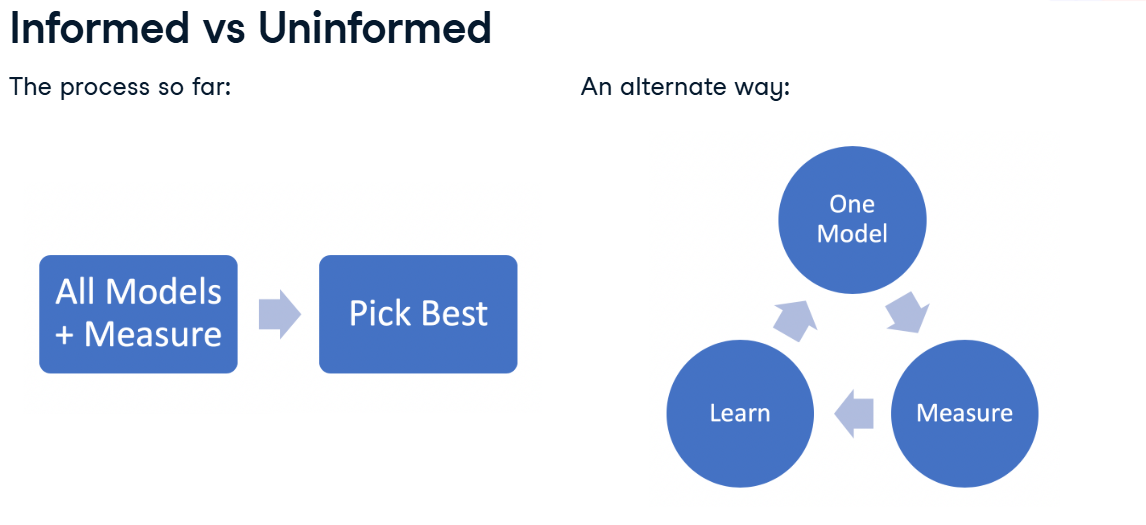

Налаштування «Від грубого до точного» оптимізує переваги пошуку за сіткою та випадкового пошуку. Воно використовує переваги обох методів.
- Широкі можливості пошуку за випадковим пошуком та включення пошуку за сіткою для глибшого охоплення у відповідний момент часу. Таким чином, воно краще використовує зусилля, щоб ви могли виконувати ітерації. Якщо ви бачите, що одна область на сітці дає погані результати, ви проведете наступний пошук в іншому місці, заощаджуючи свої зусилля.
- Також зверніть увагу, що налаштування «Від грубого до точного» дає інформацію не для кожної моделі, а для партій моделей. Тим не менш, воно є більш інформативним, ніж те, що ми робили досі!

Давайте налаштуємо пошук досить великого гіперпараметра в наступних діапазонах. Скільки існує можливих комбінацій гіперпараметрів? Якщо ми створимо комбінації, як ми робили в попередніх вправах, ми зможемо побачити 134 400 можливих комбінацій!

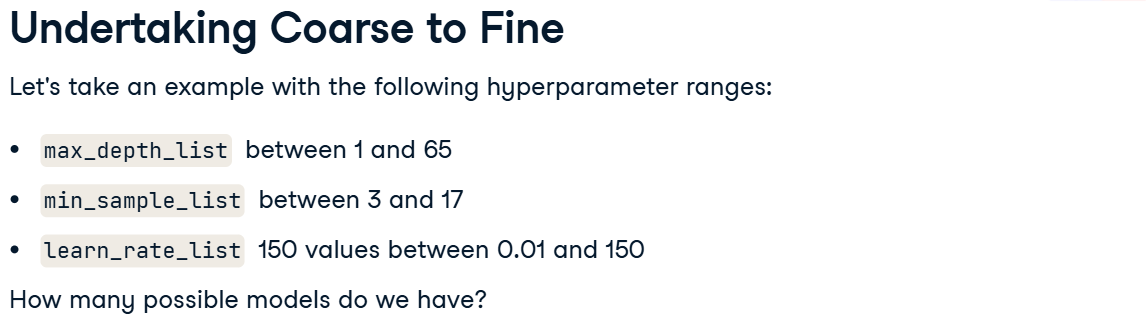

In [ ]:
# combination_list = [list(x) for x in product(max_depth_list, min_sample_list, learn_rate_list)]
# print(len(combinations_list)) # 134400

Замість того, щоб запускати всі ці моделі, ми можемо виконати випадковий пошук лише серед 500 моделей. Давайте спочатку візуалізуємо лише стовпець точності як графік щільності. Вау! Там точно були деякі погані моделі. Добре, що ми не виконали величезний пошук по сітці та не витратили на них час! Але там є й кілька хороших моделей, які гіперпараметри вони використовували?


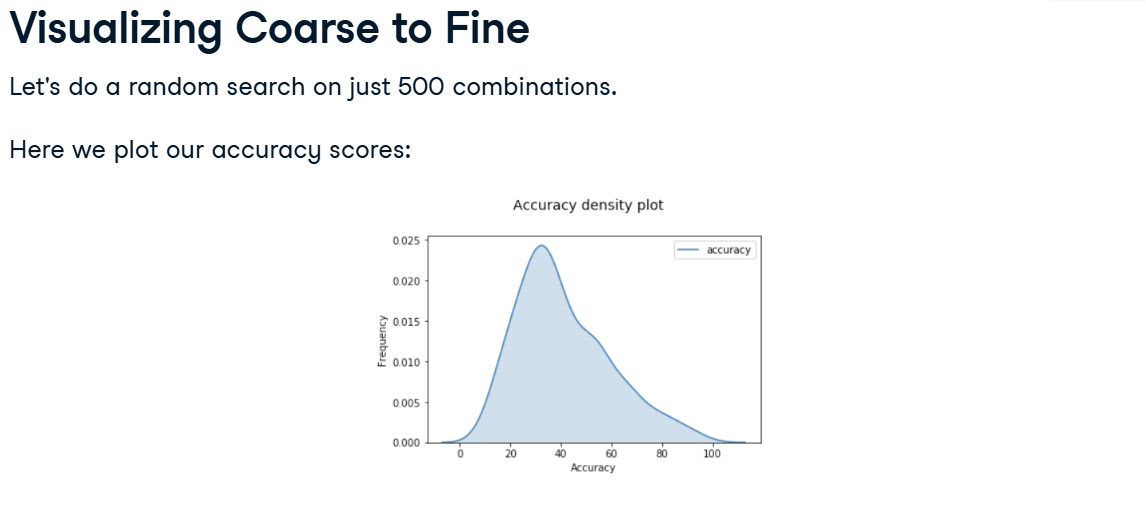

Ось знімок найкращих моделей результатів DataFrame. Хммм, це не дуже інформативно щодо того, що робити далі, чи не так? Можливо, min_samples_leaf дорівнює 7? Але ми не знаємо, чи були також погані моделі з таким самим значенням.

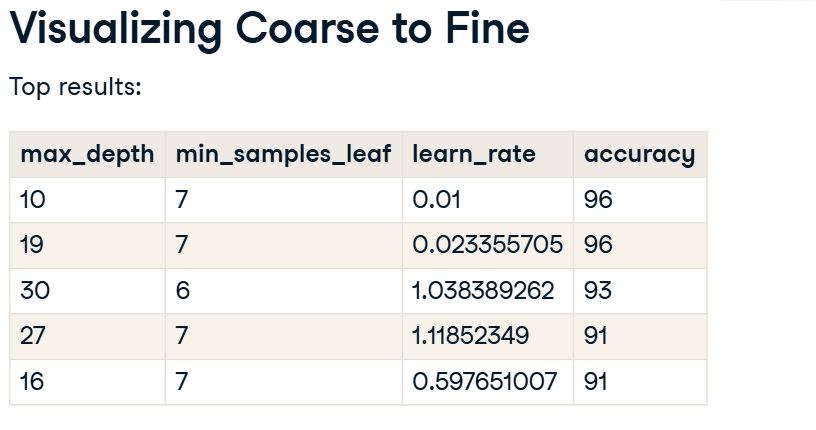

Замість цього, давайте візуалізуємо кожен гіперпараметр порівняно з показниками точності, щоб побачити, чи можемо ми побачити якісь тенденції. Ми створимо просту діаграму розсіювання, використовуючи фрейм даних результатів. Це цікавіше! Бачите, як точність має тенденцію знижуватися, коли max_depth нижче 6 або 7 і вище 30?

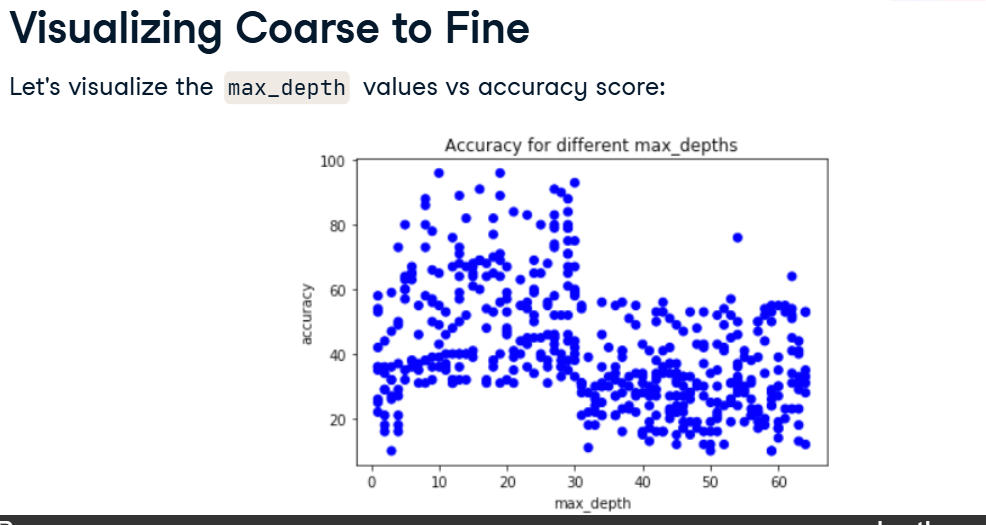

Подібна вправа з двома іншими гіперпараметрами дає деякі цікаві результати. min_samples_leaf трохи кращий нижче 8, а learn_rate здається гіршим вище 1-point-3. Тепер у нас є план для нашої наступної ітерації.

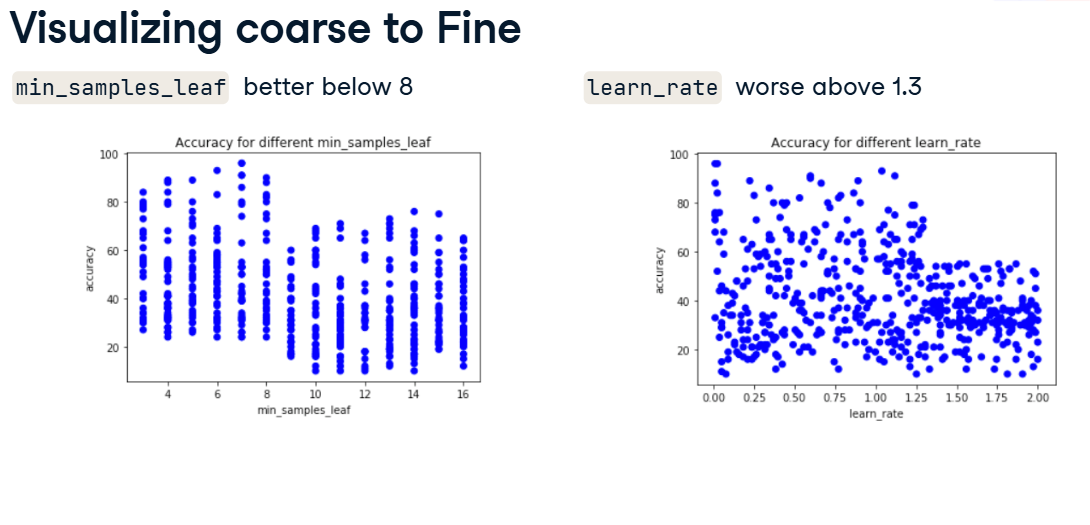![image.png]()


Підсумуємо, що ми дізналися з першого пошуку по сітці.

- Значення max_depth між 8 та 30, learn_rate менше 1-point-3
- та, можливо, min_samples_leaf менше 8, як правило, мають вищу точність.


Ви можете взяти це та виконати більш уточнений пошук по сітці або навіть інший випадковий пошук навколо цих значень, щоб покращити модель. Це просте двовимірне графічне побудова було корисним, але використання більш просунутих методів візуалізації також може виявитися корисним.

### Tasks

In [ ]:
### 1
# # Confirm the size of the combinations_list
# print(len(combinations_list))

# # Sort the results_df by accuracy and print the top 10 rows
# print(results_df.sort_values(by='accuracy', ascending=False).head(10))

# # Confirm which hyperparameters were used in this search
# print(results_df.columns)

# # Call visualize_hyperparameter() with each hyperparameter in turn
# visualize_hyperparameter('max_depth')
# visualize_hyperparameter('min_samples_leaf')
# visualize_hyperparameter('learn_rate')

In [ ]:
# def visualize_hyperparameter(name):
#   plt.clf()
#   plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
#   plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
#   plt.gca().set_ylim([0,100])
#   plt.show()

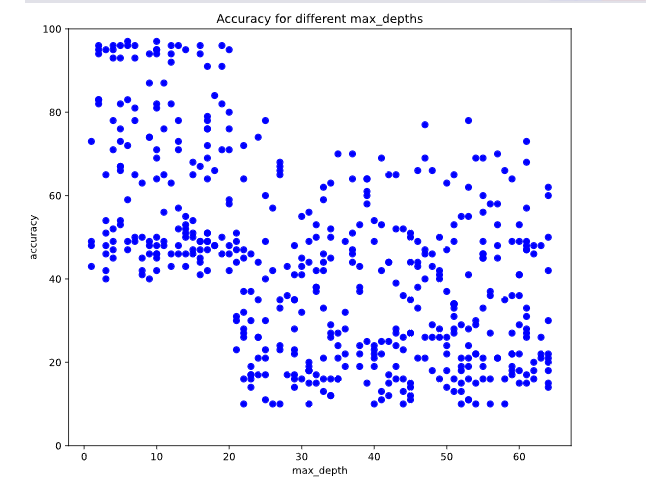

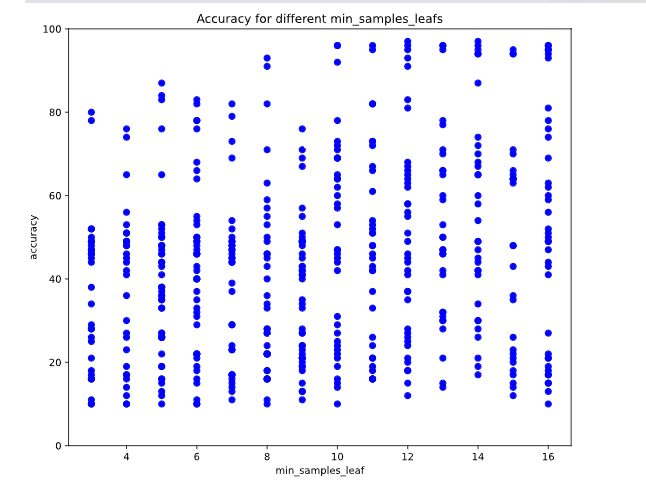

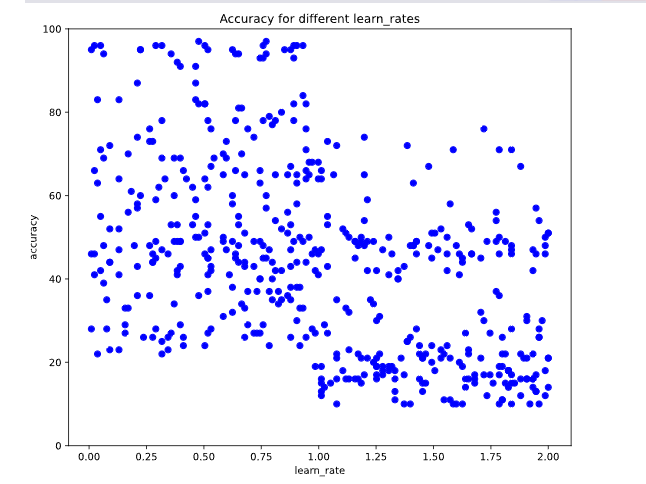

In [ ]:
### 2
# Use the provided function to visualize the first results
visualize_first()

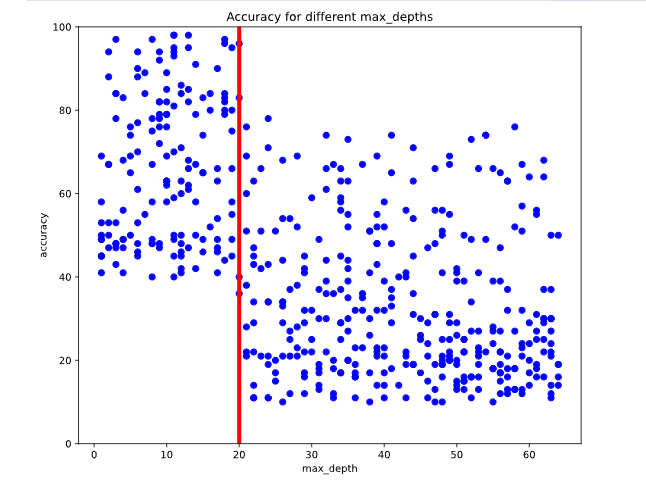

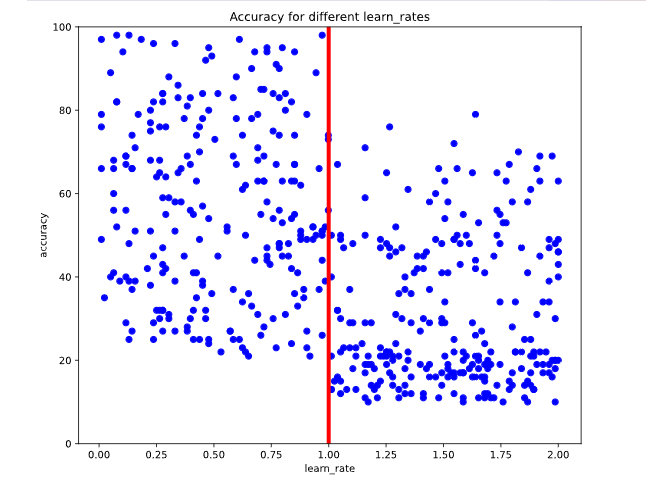

## Informed Search: Bayesian Statistics

Тепер ми розглянемо важливу статистичну концепцію та її застосування до обґрунтованого налаштування гіперпараметрів: байєсівські методи.

Правило Байєса – це відомий статистичний інструмент, який існує вже 250 років. Тож як це може бути пов'язано з машинним навчанням сьогодні? Правило Байєса – це фактично метод, за допомогою якого ми можемо ітеративно використовувати нові докази для оновлення наших переконань щодо результату. Інтуїтивно це має сенс, оскільки, використовуючи обґрунтований пошук, ми хочемо вчитися на доказах, щоб покращити налаштування наших гіперпараметрів.

Ось формула правила Баєса. Ліва частина — це ймовірність події A (яка нас цікавить), враховуючи, що подія B відбулася, де B — це деякі нові (релевантні) докази. Це відомо як «апостеріорна» гіпотеза. Права частина показує, як ми це обчислюємо. P(A) відома як «апостеріорна». Це початкова гіпотеза про подію, яка нас цікавить. Бачите, чим вона відрізняється від P(A|B)? Остання — це ймовірність за нових доказів.

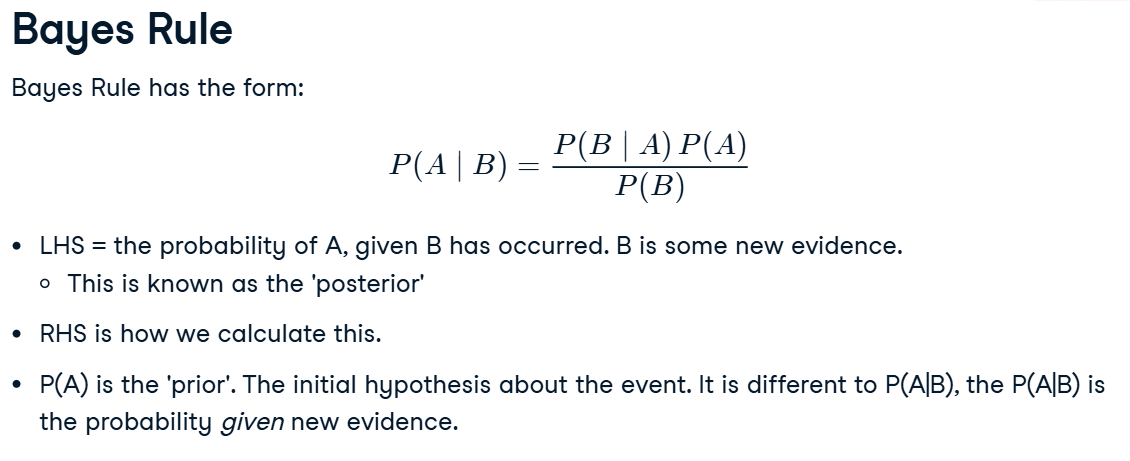

P(B) – це «гранична ймовірність», тобто ймовірність спостереження цих нових доказів. P(B|A) – це «ймовірність», тобто ймовірність спостереження доказів, враховуючи подію, яка нас цікавить. Все це може бути досить заплутаним, але давайте розглянемо поширений приклад медичного діагнозу для демонстрації.

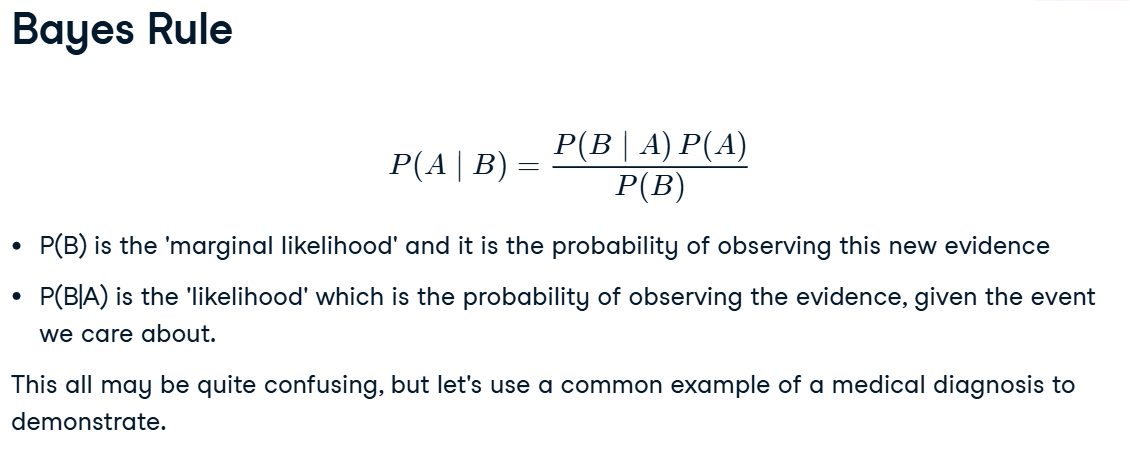

Візьмемо медичний приклад для ілюстрації байєсівського процесу. Скажімо, 5% людей у ​​загальній популяції мають певне захворювання. Це наш P(D). 10% людей генетично схильні до цього стану. Тобто, через свою генетику, вони мають більшу ймовірність захворіти на це захворювання. Це наш P(Pre). Ми також знаємо, що 20% людей із цим захворюванням схильні, що є нашим P(Pre|D).

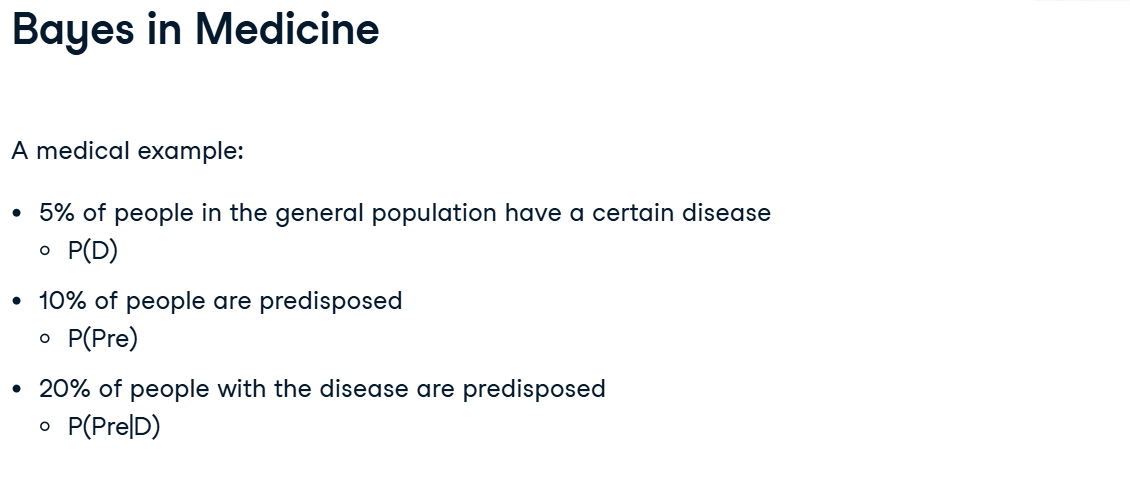

Отже, яка ймовірність того, що будь-яка людина має це захворювання? Якщо ми нічого не знаємо про людину, то ймовірність того, що вона має це захворювання, є лише апріорною. Однак, що, якщо ми додамо нові докази того, що ця людина схильна? Ми можемо оновити наші переконання, використовуючи формулу Байєса. Тепер ми бачимо, що ймовірність наявності захворювання, враховуючи, що хтось схильний, становить близько 10%, або вдвічі більше, ніж початкова апріорна ймовірність.

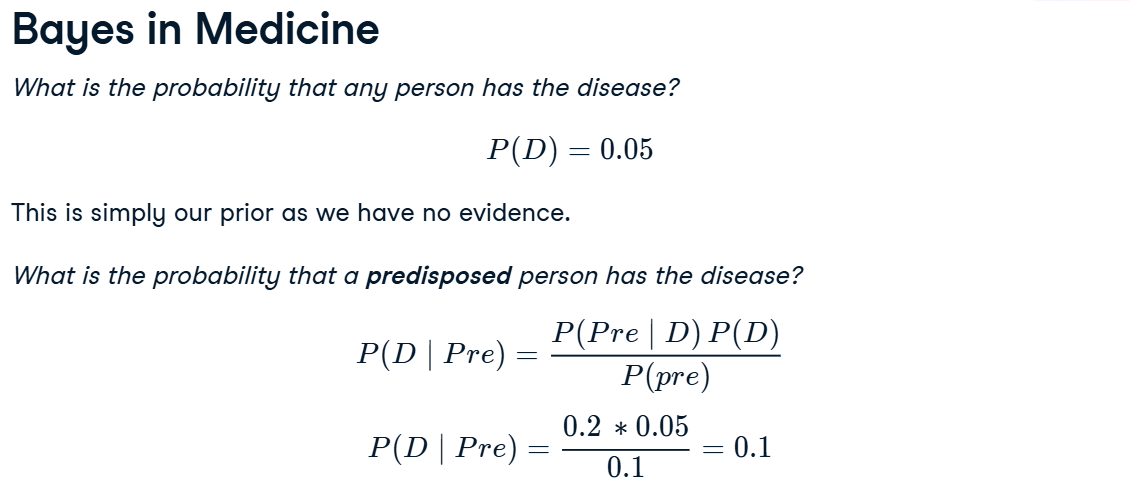

Ми можемо застосувати цю логіку до налаштування гіперпараметрів, використовуючи наступний процес. Вибрати комбінацію гіперпараметрів. Побудувати модель. Отримати нові _докази_ (оцінку моделі). Оновити наші переконання та вибрати кращі гіперпараметри в наступному раунді та продовжувати, доки не будемо задоволені результатом. Баєсівське налаштування гіперпараметрів є дуже новим, але досить популярним для більших та складніших завдань налаштування гіперпараметрів.

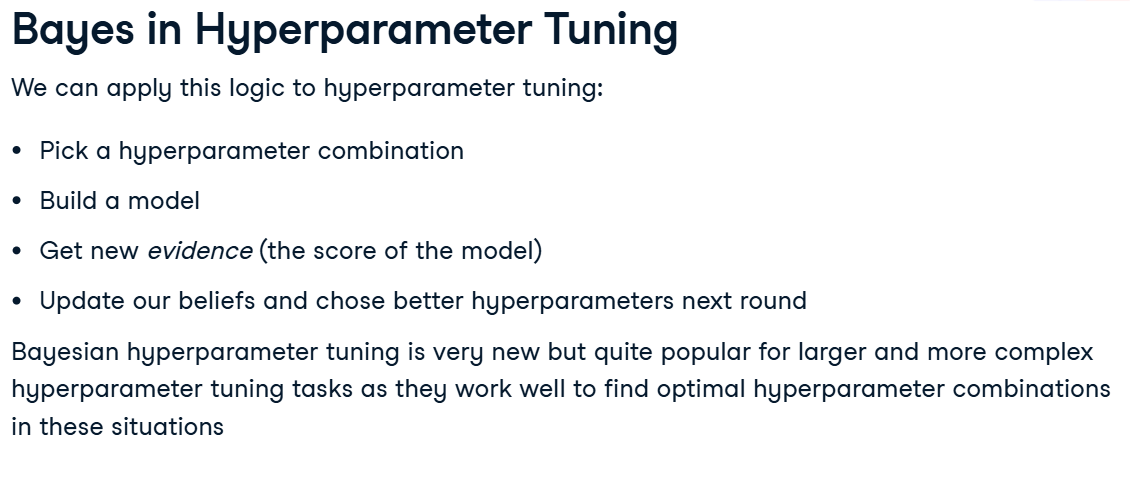

Корисним пакетом для баєсівського налаштування гіперпараметрів є Hyperopt. Щоб виконати баєсівське налаштування гіперпараметрів за допомогою цього пакета, нам спочатку потрібно встановити домен, яким є наша Grid, з невеликою незвичністю. Потім ми встановлюємо алгоритм оптимізації (ми використовуватимемо TPE за замовчуванням). Нарешті, нам потрібно встановити цільову функцію на мінімізацію: ми використовуватимемо 1-Accuracy, оскільки цей пакет намагається мінімізувати, а не максимізувати щось.

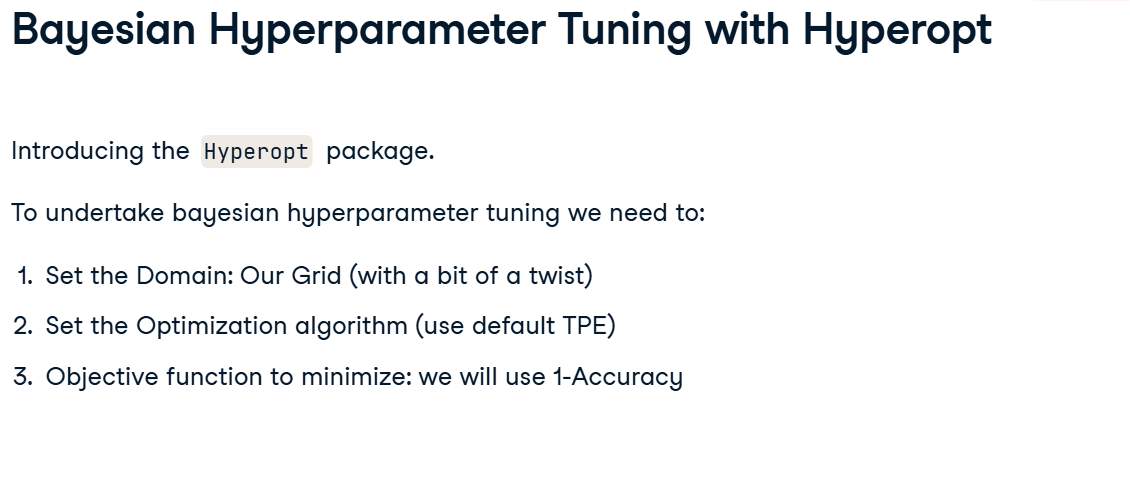

Існує багато варіантів розміщення сітки в баєсівській оптимізації, включаючи ті, що згадані на слайді. Hyperopt не використовує значення точок на сітці, а натомість кожна точка представляє ймовірності для кожного значення гіперпараметра. Для простоти ми використовуватимемо рівномірний розподіл. Існує багато інших розподілів, якщо ви перевірите документацію.

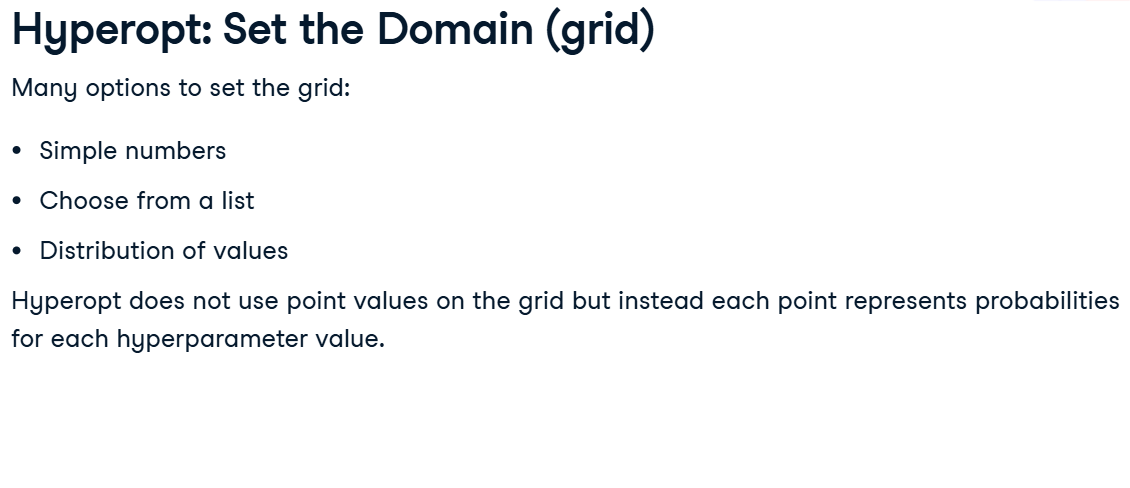

Давайте розглянемо, як налаштувати нашу сітку або домен у hyperopt. Цей код демонструє це за допомогою простого рівномірного розподілу між заданими мінімальним та максимальним значеннями. «Квантований» означає рівномірний, але квантований (або розподілений) заданим третім числом.

In [ ]:
#!pip install hyperopt

In [38]:
from hyperopt import hp, tpe, fmin

space = {
    'max_depth': hp.quniform('max_depth', 2, 10, 2),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 8, 2),
    'learning_rate': hp.uniform('learning_rate', 0.01, 1, 55)
}

Нам потрібно визначити цільову функцію для запуску алгоритму. Вона повинна враховувати параметри для тестування та використовувати їх для створення оцінки (для нас це GBM). Оцінка проходить перехресну перевірку, щоб знайти найкращий середній бал, і повертає середній збиток за складками. Нам потрібно зробити наш збиток як одиницю мінус найкращий бал, оскільки Hyperopt працюватиме над мінімізацією того, що ми повертаємо - ми не хочемо мінімізувати точність! Я також написав невелику функцію для запису результатів на кожній ітерації для подальшого аналізу.

In [40]:
from sklearn.model_selection import cross_val_score

def objective(params):
  params = {max_depth: int(params['max_depth']),
            'mean_sample_leaf': int(params['min_sample_leaf']),
            'learning_rate': params['learning_rate']}
  gbm_clf = GradientBoostingClassifier(n_estimators = 500, **params)
  best_score = cross_val_score(gbm_clf, X_train, y_train,
                               scoring = 'accuracy', cv = 10, n_jobs = 4).mean()
  loss = 1 - best_score
  write_results(best_score, params, iteration)
  return loss

Тепер нам просто потрібно викликати алгоритм. Ми задаємо йому створену нами цільову функцію, налаштований нами простір вибірок, кількість ітерацій та необов'язкове випадкове початкове значення для забезпечення узгодженості. Алгоритм є стандартним і найкращим з тих, що реалізовані на даний момент. Ця функція повертатиме лише найкращі гіперпараметри, тому ми записували результати на кожній ітерації.

In [ ]:
best_result = fmin(
    fn = objective,
    space = space,
    max_evals = 500,
    rstate = np.random.default_rng(42),
    algo = tpe.suggest
)

### Tasks

In [36]:
### 1

# Assign probabilities to variables
p_unhappy = 0.15
p_unhappy_close = 0.35

In [41]:
### 2

# Set up space dictionary with specified hyperparameters
space = {'max_depth': hp.quniform('max_depth', 2, 10, 2), 'learning_rate': hp.uniform('learning_rate', 0.001, 0.9)}

# Set up objective function
def objective(params):
    params = {'max_depth': int(params['max_depth']),'learning_rate': params['learning_rate']}
    gbm_clf = GradientBoostingClassifier(n_estimators=100, **params)
    best_score = cross_val_score(gbm_clf, X_train, y_train, scoring='accuracy', cv=2, n_jobs=4).mean()
    loss = 1 - best_score
    return loss

# Run the algorithm
best = fmin(fn=objective,space=space, max_evals=20, rstate=np.random.default_rng(42), algo=tpe.suggest)
print(best)

100%|██████████| 20/20 [09:52<00:00, 29.61s/trial, best loss: 0.17862500000000003]
{'learning_rate': np.float64(0.038093061276450534), 'max_depth': np.float64(2.0)}


## Informed Search: Genetic Algorithms


Давайте дізнаємося про іншу методологію обґрунтованого пошуку з використанням генетичного налаштування гіперпараметрів.

Щоб зрозуміти генетичні алгоритми в машинному навчанні, нам слід спочатку зрозуміти, як працює натхнення для цієї технології – біологічна еволюція. У реальному світі генетична еволюція відбувається наступним чином. По-перше, існує багато істот, яких називають потомством. Найсильніші істоти виживають у складних умовах і об'єднуються в пари. Відбувається певний «схрещування», коли вони утворюють потомство. З деякими потомками відбуваються випадкові мутації. Ці мутації іноді допомагають деяким потомкам отримати перевагу. Нарешті, повернімося до (1)! Ось як працює еволюція в природі.

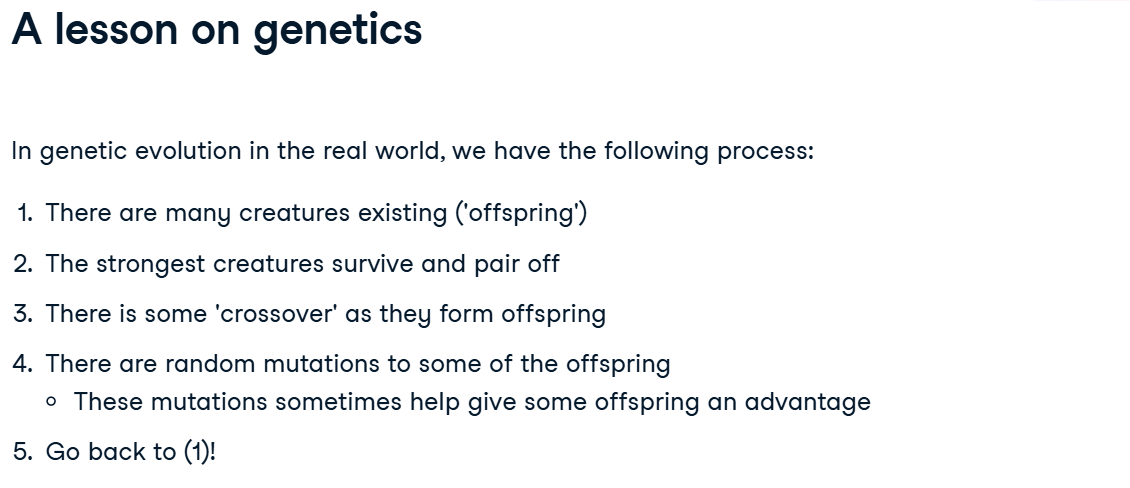

Ми можемо застосувати ту саму ідею до налаштування гіперпараметрів. По-перше, ми можемо створити кілька моделей (з налаштуваннями гіперпараметрів). По-друге, ми можемо вибрати найкращі (за допомогою нашої функції оцінювання). Це ті, що «виживають». Потім ми можемо створити нові моделі, схожі на найкращі. Ми додаємо трохи випадковості, щоб не досягти локального оптимуму. Нарешті, ми продовжуємо це, доки не будемо задоволені результатом!

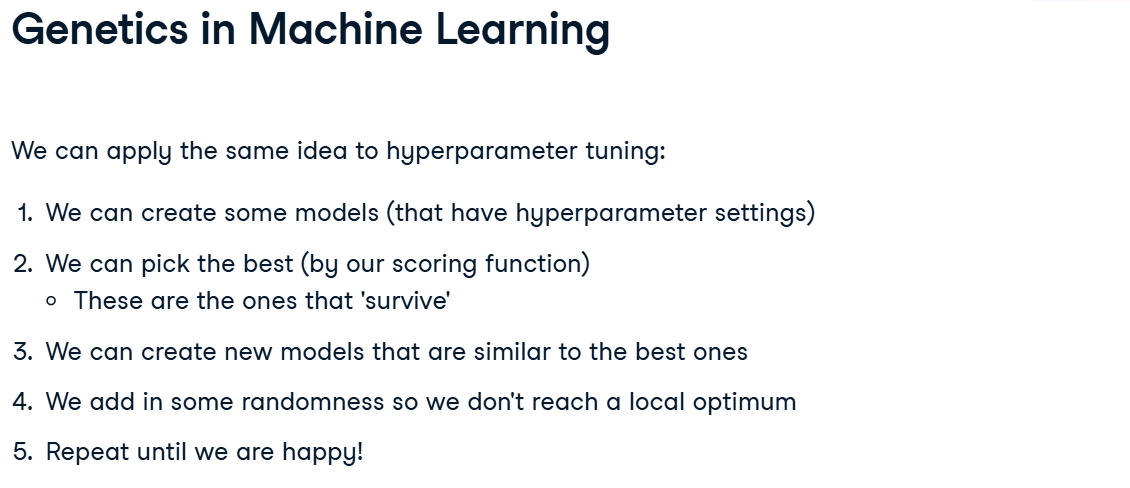

Це обґрунтований пошук, який має низку переваг. Він дозволяє нам навчатися на попередніх ітераціях, як і баєсівське налаштування гіперпараметрів. Він має додаткову перевагу певної випадковості. Ця випадковість важлива, оскільки означає, що ми не будемо просто працювати над пошуком подібних моделей та йти одним шляхом. У нас є шанс перейти до зовсім іншої області простору пошуку гіперпараметрів, яка може бути кращою. Зрештою, він вирішує багато трудомістких аспектів машинного навчання, таких як вибір алгоритму та гіперпараметра.

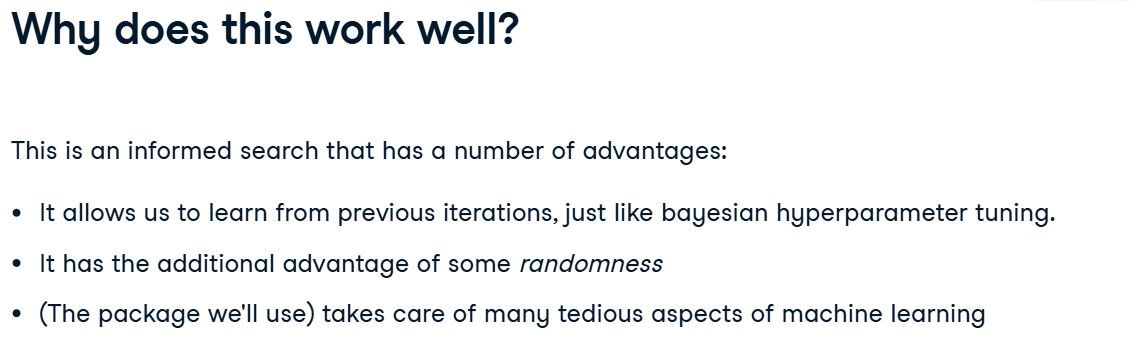

Корисна бібліотека для налаштування генетичних гіперпараметрів — це TPOT. Документація на веб-сайті пояснює її бачення. Вона прагне стати вашим помічником з Data Science, автоматично оптимізуючи конвеєри моделей за допомогою генетичного програмування. Це чудово, тому що конвеєри не лише включають модель (або кілька моделей), але й працюють над функціями та іншими аспектами процесу. Крім того, вона повертає для вас код Python конвеєра!

Ключовими аргументами класифікатора TPOT є: generations: кількість циклів, які ми виконуємо, створюючи моделі-нащадки, мутуючи та схрещуючи їх, вибираючи найкращі та продовжуючи. population_size: у кожній ітерації це кількість моделей, які ми зберігаємо. Найсильніше «нащадок». offspring_size: у кожній ітерації це кількість нащадків (для нас, моделей), яких ми створюємо. mutation_rate: ми застосовуємо випадковість до певної частки конвеєрів. Цей гіперпараметр встановлює цю частку (між 0 і 1). crossover_rate: у кожній ітерації ми схрещуємо або зводимо деякі з наших моделей, щоб знайти подібні. Це встановлює частку конвеєрів, з якими ми це робимо. scoring: цільова функція для визначення найсильніших моделей або нащадків, наприклад, точність. І, нарешті, cv, стратегія перехресної перевірки, яка буде знайома з класичного моделювання машинного навчання, яке ви використовували.

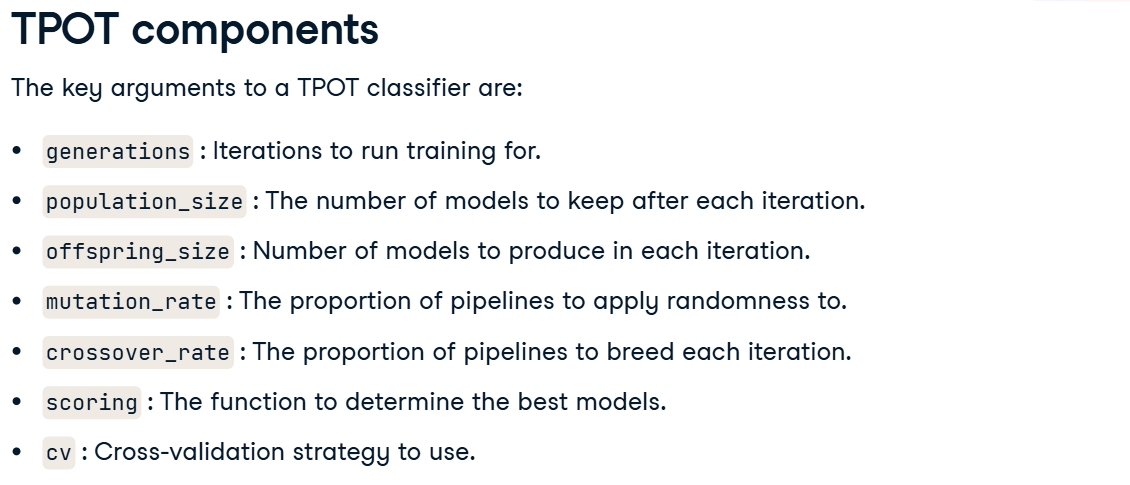

Ось дуже простий приклад. Ви помітите схожість зі способом побудови моделей за допомогою Scikit Learn. Спочатку створюємо оцінку з гіперпараметрами. Тут оцінкою є TPOTClassifier. Потім використовуємо метод точкової апроксимації та метод оцінювання, як у Scikit Learn. Ми збережемо значення за замовчуванням для mutation_rate та crossover_rate, оскільки їх краще залишити за замовчуванням без глибших знань про генетичне програмування. Параметр verbosity виведе процес у міру його виконання. Зверніть увагу, що ми навіть не вибираємо алгоритми чи гіперпараметри? TPOT робить все!

In [ ]:
#!pip install tpot

In [ ]:
#!pip uninstall -y torch

In [ ]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations = 3, population_size = 5,
                      # verbosity = 2, offspring_size = 10,
                      # scoring = 'accuracy',
                      cv = 5)
tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))

In [11]:
# Отримати найкращу модель
best_model = tpot.fitted_pipeline_

# Оцінити її на тестових даних
print(best_model.score(X_test, y_test))


0.8205


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


### Tasks

In [18]:
# Assign the values outlined to the inputs
number_generations = 3
population_size = 4
offspring_size = 3
scoring_function = 'accuracy'

# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=number_generations, population_size=population_size,
                          # offspring_size=offspring_size, scoring=scoring_function,
                          #verbosity=2,
                          random_state=2,
                          cv=2)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# # Score on the test set
# print(tpot_clf.score(X_test, y_test))

# Отримати найкращу модель
best_model = tpot_clf.fitted_pipeline_

# Оцінити її на тестових даних
print(best_model.score(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/tpot/tpot_estimator/estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
/usr/local/lib/python3.12/dist-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40153 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:38225
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:40153/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44249'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:38309 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:38309
INFO:dis

0.8221666666666667


In [19]:
# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=2, population_size=4,
                          # offspring_size=3, scoring='accuracy',
                          cv=2,
                          #verbosity=2,
                          random_state=42)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# # Score on the test set
# print(tpot_clf.score(X_test, y_test))

# Отримати найкращу модель
best_model = tpot_clf.fitted_pipeline_

# Оцінити її на тестових даних
print(best_model.score(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/tpot/tpot_estimator/estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
/usr/local/lib/python3.12/dist-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40109 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:40603
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:40109/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40911'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:39719 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:39719
INFO:dis

0.8195
